**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [5]:
import numpy as np

def Bayes1a(X_train, Y_train, X_test):
    # Calculate the ML estimates for the means
    mu_minus = X_train[Y_train == -1].mean(axis=0)
    mu_plus = X_train[Y_train == 1].mean(axis=0)
    
    # Predict using the Bayes classifier
    Y_test_pred = np.array([1 if np.linalg.norm(x - mu_plus) < np.linalg.norm(x - mu_minus) else -1 for x in X_test])
    
    return (Y_test_pred)

def Bayes1b(X_train, Y_train, X_test):
    # Calculate the ML estimates for the means
    mu_minus = X_train[Y_train == -1].mean(axis=0)
    mu_plus = X_train[Y_train == 1].mean(axis=0)
    
    # Calculate the ML estimate for the shared covariance matrix
    n_minus = np.sum(Y_train == -1)
    n_plus = np.sum(Y_train == 1)
    sigma = ((X_train[Y_train == -1] - mu_minus).T @ (X_train[Y_train == -1] - mu_minus) + 
             (X_train[Y_train == 1] - mu_plus).T @ (X_train[Y_train == 1] - mu_plus)) / (len(X_train) - 2)
    
    # Predict using the Bayes classifier
    inv_sigma = np.linalg.inv(sigma)
    Y_test_pred = np.array([1 if (x - mu_plus) @ inv_sigma @ (x - mu_plus).T < (x - mu_minus) @ inv_sigma @ (x - mu_minus).T else -1 for x in X_test])
    
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    # Calculate the ML estimates for the means
    mu_minus = X_train[Y_train == -1].mean(axis=0)
    mu_plus = X_train[Y_train == 1].mean(axis=0)
    
    # Calculate the ML estimates for the separate covariance matrices
    sigma_minus = (X_train[Y_train == -1] - mu_minus).T @ (X_train[Y_train == -1] - mu_minus) / np.sum(Y_train == -1)
    sigma_plus = (X_train[Y_train == 1] - mu_plus).T @ (X_train[Y_train == 1] - mu_plus) / np.sum(Y_train == 1)
    
    # Predict using the Bayes classifier
    inv_sigma_minus = np.linalg.inv(sigma_minus)
    inv_sigma_plus = np.linalg.inv(sigma_plus)
    Y_test_pred = np.array([1 if (x - mu_plus) @ inv_sigma_plus @ (x - mu_plus).T < (x - mu_minus) @ inv_sigma_minus @ (x - mu_minus).T else -1 for x in X_test])
    
    return Y_test_pred


# Assuming the Bayes1a, Bayes1b, and Bayes1c functions are defined as provided earlier

datasets = ['../../Data/dataset1_1.npz', '../../Data/dataset1_2.npz', '../../Data/dataset1_3.npz']
datass=['dataset1_1.npz', 'dataset1_2.npz', 'dataset1_3.npz']
classifiers = [Bayes1a, Bayes1b, Bayes1c]
classifier_names = ['Bayes1a', 'Bayes1b', 'Bayes1c']

# Load datasets and run classifiers
for dataset, dd in zip(datasets, datass):
    with np.load(dataset) as data:
        X_train = data['arr_0']
        Y_train = data['arr_1']
        X_test = data['arr_2']
        Y_test = data['arr_3']
        
        # Print dataset name
        print(f"Dataset: {dd}")
        
        for classifier, name in zip(classifiers, classifier_names):
            # Get predictions
            Y_test_pred = classifier(X_train, Y_train, X_test)
            
            # Print classifier name and predictions
            print(f"{name} predictions: {Y_test_pred}")
        
        # Print a separator
        print("-" * 30)




Dataset: dataset1_1.npz
Bayes1a predictions: [ 1  1  1 ...  1 -1 -1]
Bayes1b predictions: [ 1  1  1 ...  1 -1 -1]
Bayes1c predictions: [ 1  1  1 ...  1 -1 -1]
------------------------------
Dataset: dataset1_2.npz
Bayes1a predictions: [ 1  1  1 ... -1 -1 -1]
Bayes1b predictions: [ 1  1  1 ... -1 -1 -1]
Bayes1c predictions: [ 1  1  1 ... -1 -1 -1]
------------------------------
Dataset: dataset1_3.npz
Bayes1a predictions: [ 1  1 -1 ... -1  1 -1]
Bayes1b predictions: [ 1  1 -1 ... -1  1  1]
Bayes1c predictions: [ 1  1  1 ... -1 -1  1]
------------------------------


In [6]:


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


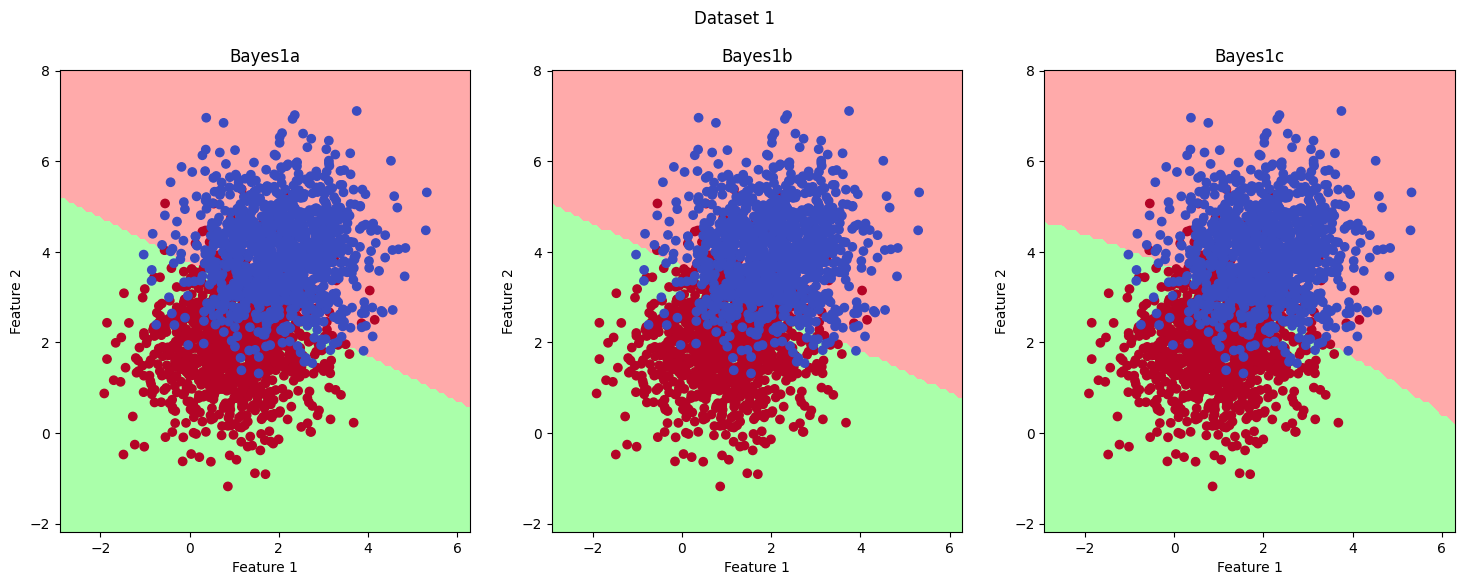

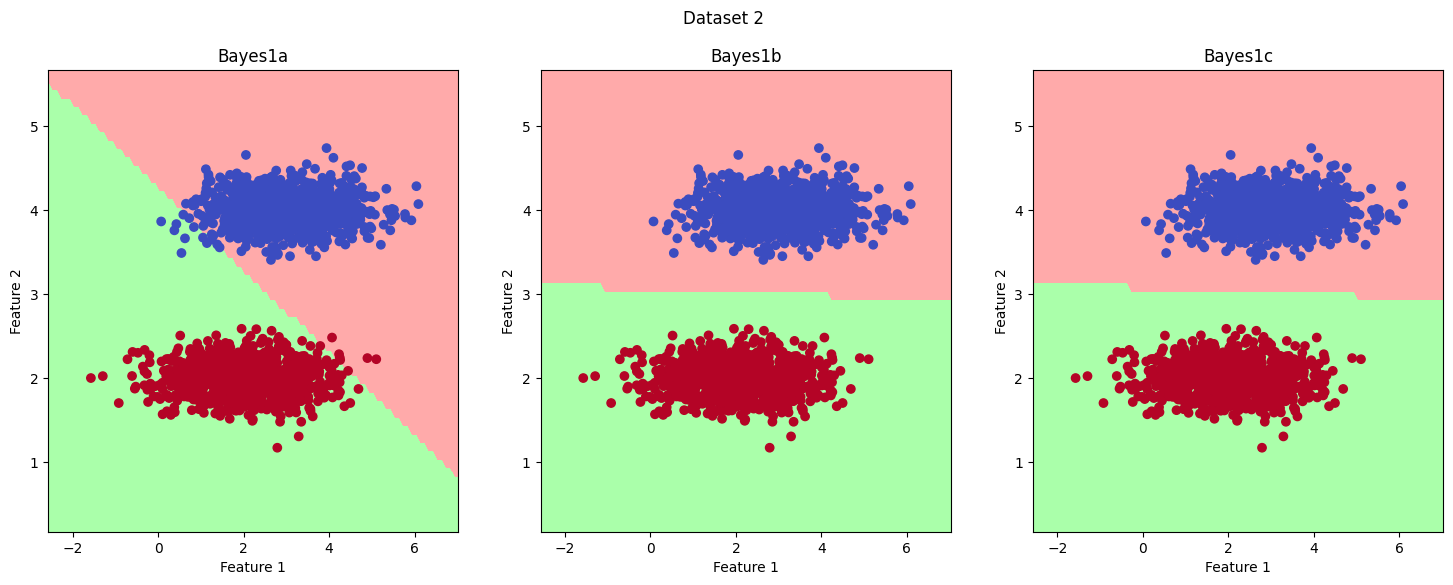

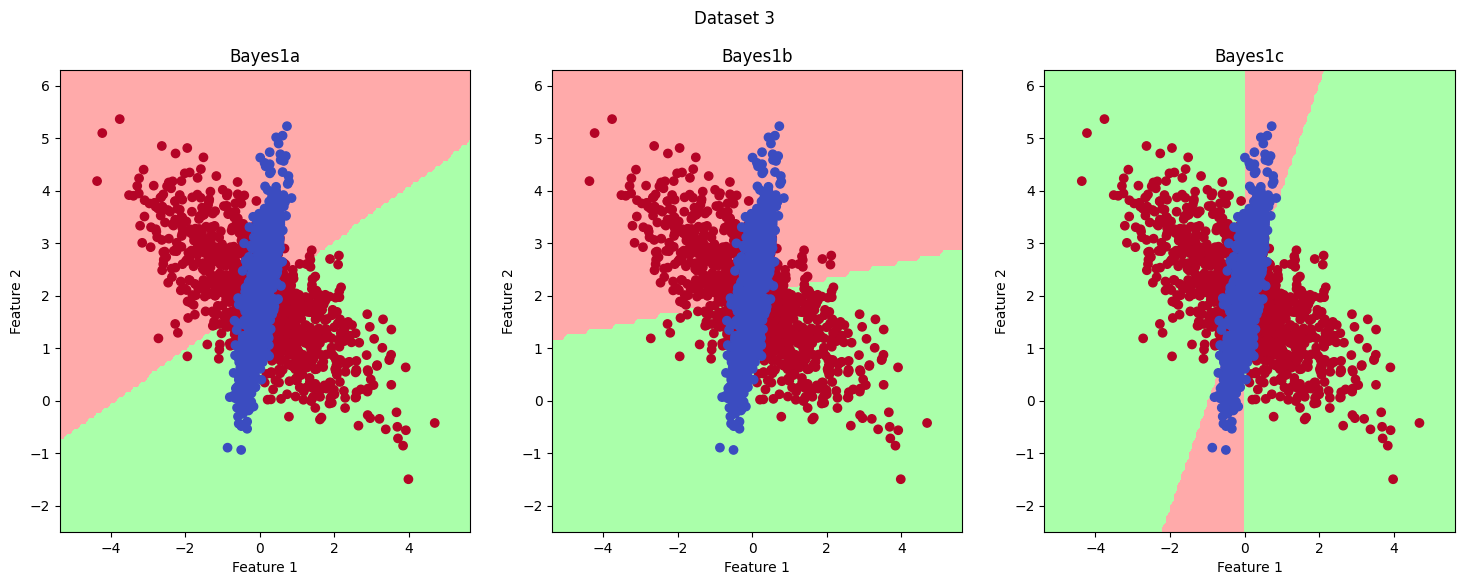

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Assuming the Bayes1a, Bayes1b, and Bayes1c functions are defined as provided earlier

def plot_decision_boundary(X, Y, classifier, title):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class using data and classifier
    Z = classifier(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    # from matplotlib.colors import ListedColormap
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

datasets = ['../../Data/dataset1_1.npz', '../../Data/dataset1_2.npz', '../../Data/dataset1_3.npz']
classifiers = [Bayes1a, Bayes1b, Bayes1c]
titles = ['Bayes1a', 'Bayes1b', 'Bayes1c']

# Load datasets and run classifiers
for i, dataset in enumerate(datasets):
    with np.load(dataset) as data:
        X_train = data['arr_0']
        Y_train = data['arr_1']
        X_test = data['arr_2']
        Y_test = data['arr_3']
    
        plt.figure(figsize=(18, 6))
        for j, classifier in enumerate(classifiers):
            plt.subplot(1, 3, j+1)
            plot_decision_boundary(X_train, Y_train, lambda x: classifier(X_train, Y_train, x), titles[j])
        plt.suptitle(f'Dataset {i+1}')
        plt.show()



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [15]:
import numpy as np
from scipy.stats import multivariate_normal

def calculate_posterior(X, mu, cov, prior):
    return multivariate_normal.pdf(X, mean=mu, cov=cov) * prior

def predict_with_loss_matrix(post_probs, loss_matrix):
    expected_losses = np.dot(post_probs, loss_matrix)
    return np.argmin(expected_losses, axis=1) + 1

def Bayes2a(X_train, Y_train, X_test):
    classes = np.unique(Y_train)
    priors = np.array([np.mean(Y_train == c) for c in classes])
    mus = np.array([np.mean(X_train[Y_train == c], axis=0) for c in classes])
    cov = np.identity(X_train.shape[1])
    loss_matrix = np.array([[0, 1, 2, 3],
                            [1, 0, 1, 2],
                            [2, 1, 0, 1],
                            [3, 2, 1, 0]])
    
    post_probs = np.array([calculate_posterior(X_test, mu, cov, prior) for mu, prior in zip(mus, priors)])
    return predict_with_loss_matrix(post_probs.T, loss_matrix)

def Bayes2b(X_train, Y_train, X_test):
    classes = np.unique(Y_train)
    priors = np.array([np.mean(Y_train == c) for c in classes])
    mus = np.array([np.mean(X_train[Y_train == c], axis=0) for c in classes])
    cov = np.cov(X_train.T)
    
    post_probs = np.array([calculate_posterior(X_test, mu, cov, prior) for mu, prior in zip(mus, priors)])
    return predict_with_loss_matrix(post_probs.T, loss_matrix)

def Bayes2c(X_train, Y_train, X_test):
    classes = np.unique(Y_train)
    priors = np.array([np.mean(Y_train == c) for c in classes])
    mus = np.array([np.mean(X_train[Y_train == c], axis=0) for c in classes])
    covs = np.array([np.cov(X_train[Y_train == c].T) for c in classes])
    
    post_probs = np.array([calculate_posterior(X_test, mu, cov, prior) for mu, cov, prior in zip(mus, covs, priors)])
    return predict_with_loss_matrix(post_probs.T, loss_matrix)


In [ ]:

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


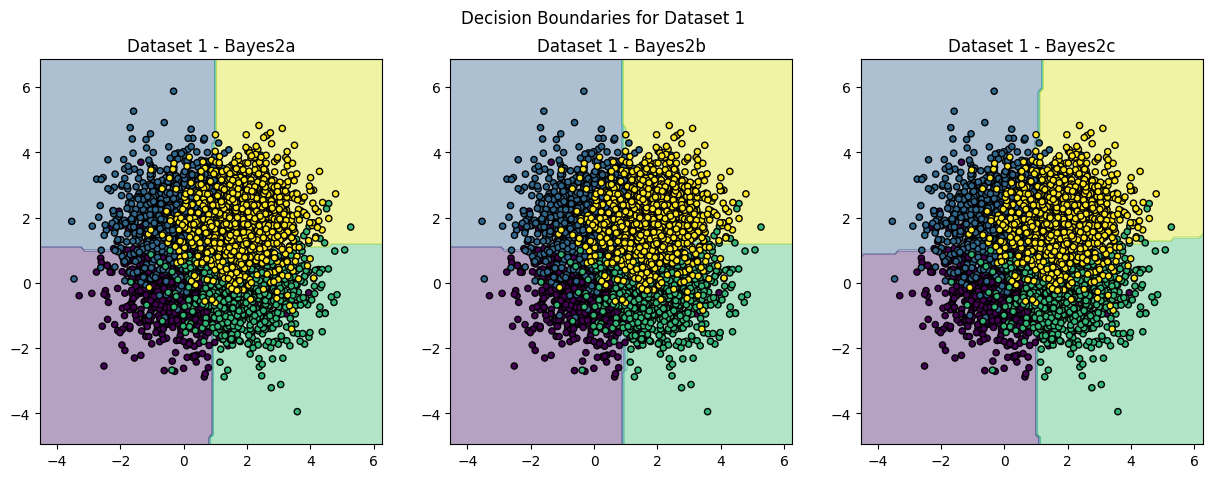

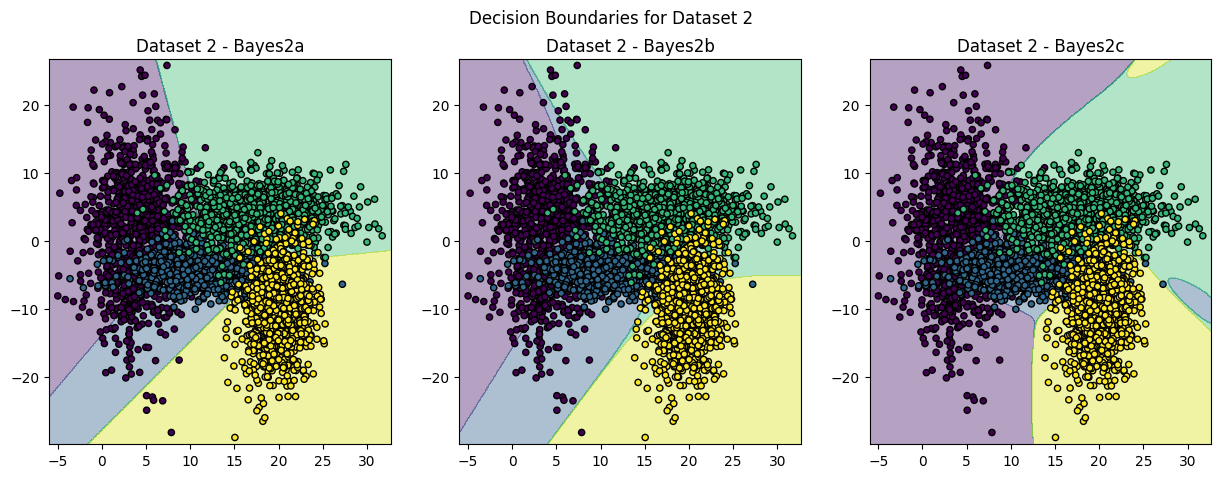

Expected loss for Bayes2a on dataset 1: 0.42975
Confusion matrix for Bayes2a on dataset 1:
[[633 219 136  12]
 [ 97 738  62 103]
 [ 86  49 770  95]
 [ 15 136 194 655]]

Expected loss for Bayes2b on dataset 1: 0.4575
Confusion matrix for Bayes2b on dataset 1:
[[463 388 145   4]
 [ 43 791 113  53]
 [ 40  95 818  47]
 [  4 149 346 501]]

Expected loss for Bayes2c on dataset 1: 0.428
Confusion matrix for Bayes2c on dataset 1:
[[633 218 138  11]
 [ 99 742  61  98]
 [ 87  47 772  94]
 [ 15 134 201 650]]

Expected loss for Bayes2a on dataset 2: 0.1835
Confusion matrix for Bayes2a on dataset 2:
[[830 150  18   2]
 [ 93 784  46  77]
 [ 30  61 905   4]
 [  0  23  78 899]]

Expected loss for Bayes2b on dataset 2: 0.26025
Confusion matrix for Bayes2b on dataset 2:
[[675 302  23   0]
 [ 39 749 205   7]
 [  7 118 875   0]
 [  0   3 297 700]]

Expected loss for Bayes2c on dataset 2: 0.1405
Confusion matrix for Bayes2c on dataset 2:
[[901  80  19   0]
 [ 64 824  47  65]
 [ 19  31 936  14]
 [  0  36  4

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.stats import multivariate_normal as mn

# Define the loss matrix
loss_matrix = np.array([[0, 1, 2, 3],
                        [1, 0, 1, 2],
                        [2, 1, 0, 1],
                        [3, 2, 1, 0]])

# Define the Bayes classifiers

def Bayes2a(X_train, Y_train, X_test):
    classes = np.unique(Y_train)
    priors = [np.mean(Y_train == c) for c in classes]
    mus = [X_train[Y_train == c].mean(axis=0) for c in classes]
    cov = np.identity(X_train.shape[1])
    
    predictions = []
    for x in X_test:
        posteriors = [mn.pdf(x, mean=mu, cov=cov) * prior 
                      for mu, prior in zip(mus, priors)]
        expected_losses = [np.dot(loss_matrix[:, i], posteriors) for i in range(len(classes))]
        predictions.append(np.argmin(expected_losses) + 1)
    return np.array(predictions)

def Bayes2b(X_train, Y_train, X_test):
    classes = np.unique(Y_train)
    priors = [np.mean(Y_train == c) for c in classes]
    mus = [X_train[Y_train == c].mean(axis=0) for c in classes]
    cov = np.cov(X_train.T)
    
    predictions = []
    for x in X_test:
        posteriors = [mn.pdf(x, mean=mu, cov=cov) * prior 
                      for mu, prior in zip(mus, priors)]
        expected_losses = [np.dot(loss_matrix[:, i], posteriors) for i in range(len(classes))]
        predictions.append(np.argmin(expected_losses) + 1)
    return np.array(predictions)

def Bayes2c(X_train, Y_train, X_test):
    classes = np.unique(Y_train)

    priors = [np.mean(Y_train == c) for c in classes]
    mus = [X_train[Y_train == c].mean(axis=0) for c in classes]
    covs = [np.cov(X_train[Y_train == c].T) for c in classes]
    
    predictions = []
    for x in X_test:
        posteriors = [mn.pdf(x, mean=mu, cov=cov) * prior 
                      for mu, cov, prior in zip(mus, covs, priors)]
        expected_losses = [np.dot(loss_matrix[:, i], posteriors) for i in range(len(classes))]
        predictions.append(np.argmin(expected_losses) + 1)
    return np.array(predictions)

# Load the datasets
def load_data(file_name):
    with np.load(file_name) as data:
        X_train = data['arr_0']
        Y_train = data['arr_1']
        X_test = data['arr_2']
        Y_test = data['arr_3']
    return X_train, Y_train, X_test, Y_test

# Calculate expected loss
def calculate_expected_loss(Y_true, Y_pred):
    # Convert Y_true and Y_pred to integer type if they are not already
    
    Y_true = Y_true.astype(int)
    Y_pred = Y_pred.astype(int)
    
    # Calculate the total loss using the loss matrix
    total_loss = np.sum([loss_matrix[true - 1, pred - 1] for true, pred in zip(Y_true, Y_pred)])
    
    # Return the average loss
    return total_loss / len(Y_true)

# Plot decision boundaries and calculate expected loss and confusion matrices
def plot_and_evaluate(X_train, Y_train, X_test, Y_test, classifiers, dataset_name):
    fig, axs = plt.subplots(1, len(classifiers), figsize=(15, 5))
    fig.suptitle(f'Decision Boundaries for {dataset_name}')
    
    # Create a mesh to plot in
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    for i, clf in enumerate(classifiers):
        # Predict class using data and classifier 
        Z = clf(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot the contours
        axs[i].contourf(xx, yy, Z, alpha=0.4)
        axs[i].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k')
        axs[i].set_title(f'{dataset_name} - {clf.__name__}')
    
    plt.show()

# Define the classifiers list
classifiers = [Bayes2a, Bayes2b, Bayes2c]

# Load datasets
X_train_1, Y_train_1, X_test_1, Y_test_1 = load_data('../../Data/dataset2_1.npz')
X_train_2, Y_train_2, X_test_2, Y_test_2 = load_data('../../Data/dataset2_2.npz')

# Plot and evaluate for both datasets
plot_and_evaluate(X_train_1, Y_train_1, X_test_1, Y_test_1, classifiers, 'Dataset 1')
plot_and_evaluate(X_train_2, Y_train_2, X_test_2, Y_test_2, classifiers, 'Dataset 2')

# Calculate and print expected loss and confusion matrices
for i, (X_train, Y_train, X_test, Y_test) in enumerate([(X_train_1, Y_train_1, X_test_1, Y_test_1), 
                                                         (X_train_2, Y_train_2, X_test_2, Y_test_2)]):
    for clf in classifiers:
        Y_pred = clf(X_train, Y_train, X_test)
        loss = calculate_expected_loss(Y_test, Y_pred)
        conf_matrix = confusion_matrix(Y_test, Y_pred)
        print(f'Expected loss for {clf.__name__} on dataset {i+1}: {loss}')
        print(f'Confusion matrix for {clf.__name__} on dataset {i+1}:\n{conf_matrix}\n')




**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




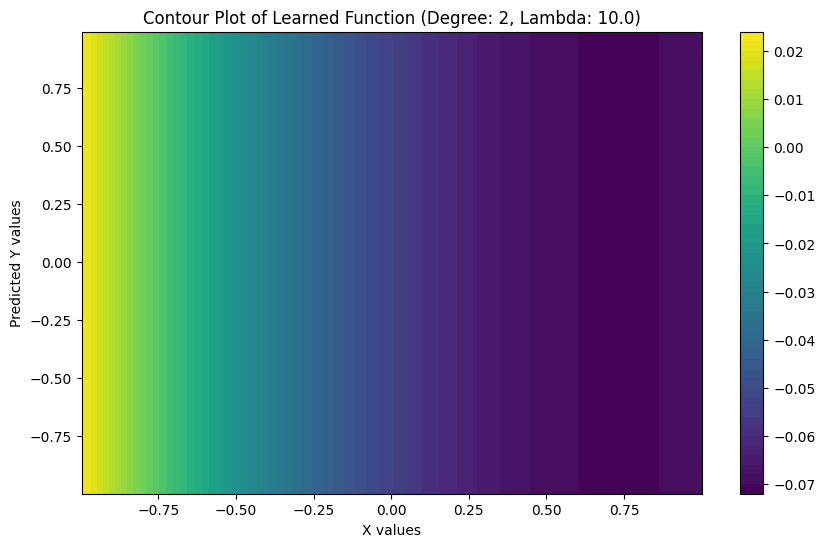

The best degree based on test error is 2 with lambda 10.0 resulting in an error of 0.2629024296007161.

Training size: 50
Train Errors:
[[0.29331753 0.29331753 0.29331753 0.29331753 0.29331763 0.2938609 ]
 [0.28753948 0.28753948 0.28753948 0.28753948 0.28754257 0.29046905]
 [0.27169028 0.27169028 0.27169028 0.27169067 0.27344181 0.29034867]
 [0.24334298 0.24334298 0.24334911 0.24916834 0.26717197 0.28859835]
 [0.22715483 0.2306508  0.23356596 0.24545025 0.25949912 0.28426475]]
Test Errors:
[[0.26567568 0.26567568 0.26567568 0.26567531 0.26563884 0.26345315]
 [0.27438109 0.27438109 0.27438105 0.27437717 0.27400167 0.2650544 ]
 [0.28473945 0.28473943 0.28473798 0.28459352 0.27652284 0.26522056]
 [0.32324293 0.32323348 0.32232564 0.29796659 0.28211277 0.26458408]
 [0.36636308 0.34128618 0.3285865  0.30472173 0.2893889  0.2646491 ]]

Training size: 100
Train Errors:
[[0.26690843 0.26690843 0.26690843 0.26690843 0.26690846 0.26712894]
 [0.26146577 0.26146577 0.26146577 0.26146577 0.26146663

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.load('../../Data/dataset3_1.npz')
X_train, y_train, X_test, y_test = [data[f'arr_{i}'].flatten() for i in range(4)]

# Define the polynomial ridge regression function
def polynomial_ridge_regression(X, y, degree, lam):
    # Create polynomial features
    poly_features = np.vander(X, degree + 1, increasing=True)
    # Compute the weights using the closed-form solution
    I = np.eye(poly_features.shape[1])
    w = np.linalg.inv(poly_features.T @ poly_features + lam * I) @ poly_features.T @ y
    return w

# Define the error computation function
def compute_errors(X, y, w, degree):
    # Ensure X is one-dimensional and has the same length as y
    X = X.flatten()[:y.shape[0]]
    
    # Create polynomial features
    poly_features = np.vander(X, degree + 1, increasing=True)
    
    # Make predictions
    predictions = poly_features @ w
    
    # Check if the predictions and labels have the same length
    if predictions.shape[0] != y.shape[0]:
        raise ValueError(f"Shape mismatch: Predictions of shape {predictions.shape} and "
                         f"labels of shape {y.shape} must have the same length.")
    
    # Compute the mean squared error
    error = np.mean((predictions - y) ** 2)
    return error

# When calling compute_errors, ensure that X_test is the correct shape
# test_errors[subset_size][i, j] = compute_errors(X_test[:y_test.shape[0]], y_test, w, degree)

# Initialize the tables for recording errors
train_errors = {size: np.zeros((5, 6)) for size in [50, 100, 200, 1000]}
test_errors = {size: np.zeros((5, 6)) for size in [50, 100, 200, 1000]}

# Define degrees and lambdas
degrees = [1, 2, 4, 8, 16]
lambdas = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

# Loop over subset sizes, degrees, and lambdas
for subset_size in [50, 100, 200, 1000]:
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    for i, degree in enumerate(degrees):
        for j, lam in enumerate(lambdas):
            # Train the model and compute errors
            w = polynomial_ridge_regression(X_subset, y_subset, degree, lam)
            train_errors[subset_size][i, j] = compute_errors(X_subset, y_subset, w, degree)
            test_errors[subset_size][i, j] = compute_errors(X_test, y_test, w, degree)

# Find the best degree and lambda based on test error
best_degree, best_lambda, best_error = None, None, float('inf')
for size in [50, 100, 200, 1000]:
    min_error = np.min(test_errors[size])
    if min_error < best_error:
        best_error = min_error
        best_degree, best_lambda = np.unravel_index(np.argmin(test_errors[size]), (5, 6))

# Plot the contour of the learned function for the best hyper-parameters
w_best = polynomial_ridge_regression(X_train[:1000], y_train[:1000], degrees[best_degree], lambdas[best_lambda])
x_range = np.linspace(X_train.min(), X_train.max(), 200)
y_range = np.linspace(y_train.min(), y_train.max(), 200)
X, Y = np.meshgrid(x_range, y_range)
Z = np.vander(X.flatten(), degrees[best_degree] + 1, increasing=True) @ w_best
Z = Z.reshape(X.shape)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.title(f'Contour Plot of Learned Function (Degree: {degrees[best_degree]}, Lambda: {lambdas[best_lambda]})')
plt.xlabel('X values')
plt.ylabel('Predicted Y values')
plt.show()

# Output the best hyperparameters and error tables
print(f"The best degree based on test error is {degrees[best_degree]} with lambda {lambdas[best_lambda]} resulting in an error of {best_error}.")
for size in [50, 100, 200, 1000]:
    print(f"\nTraining size: {size}")
    print("Train Errors:")
    print(train_errors[size])
    print("Test Errors:")
    print(test_errors[size])


**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











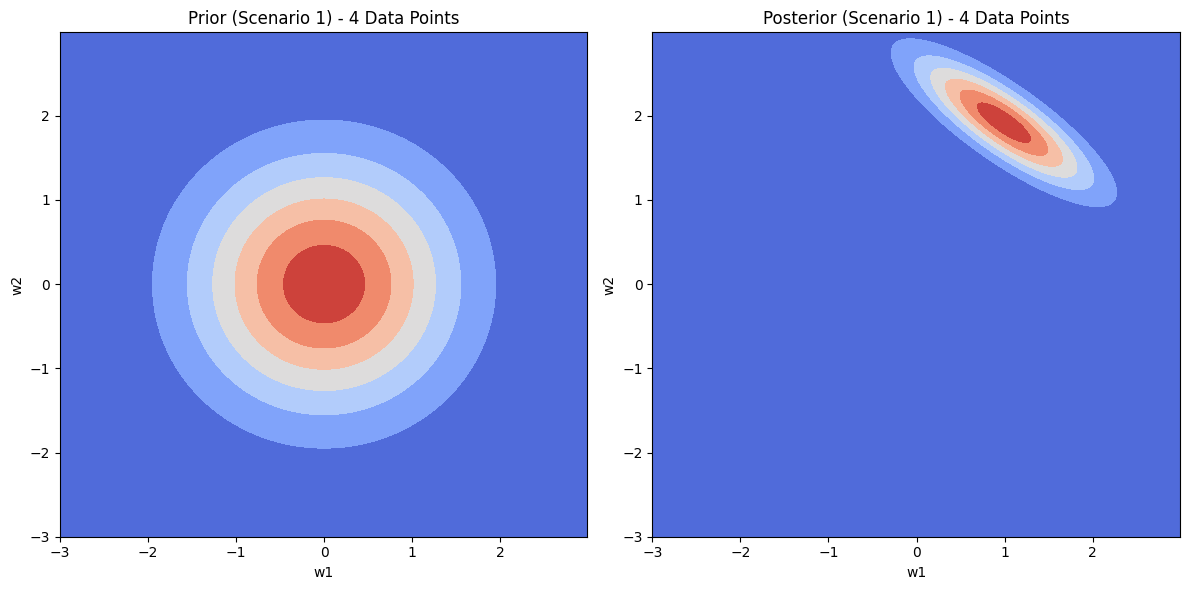

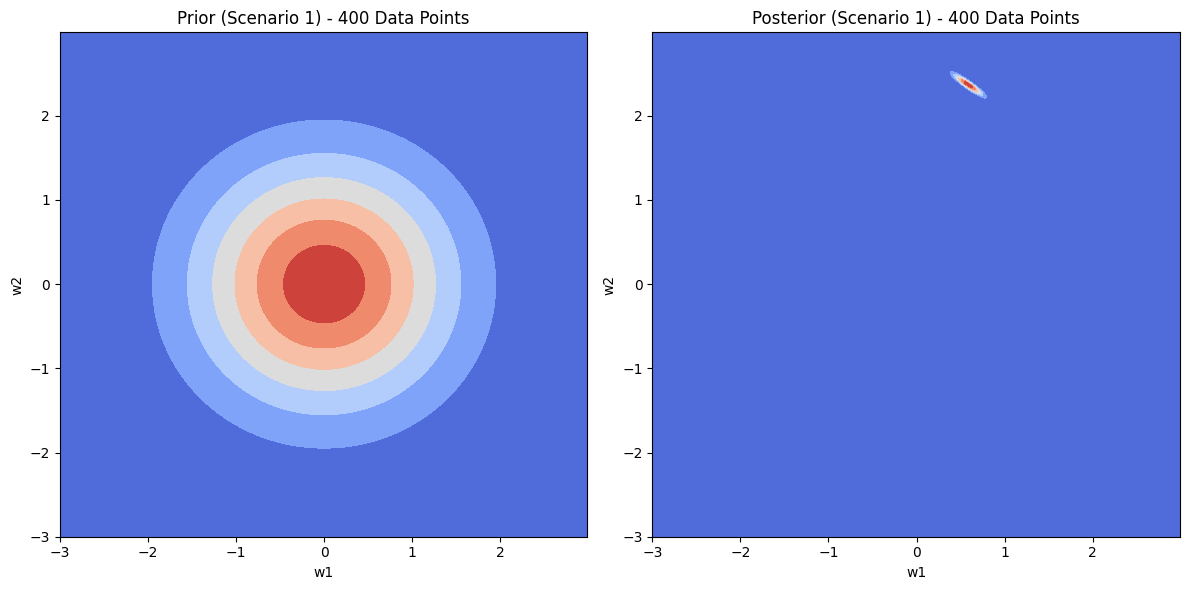

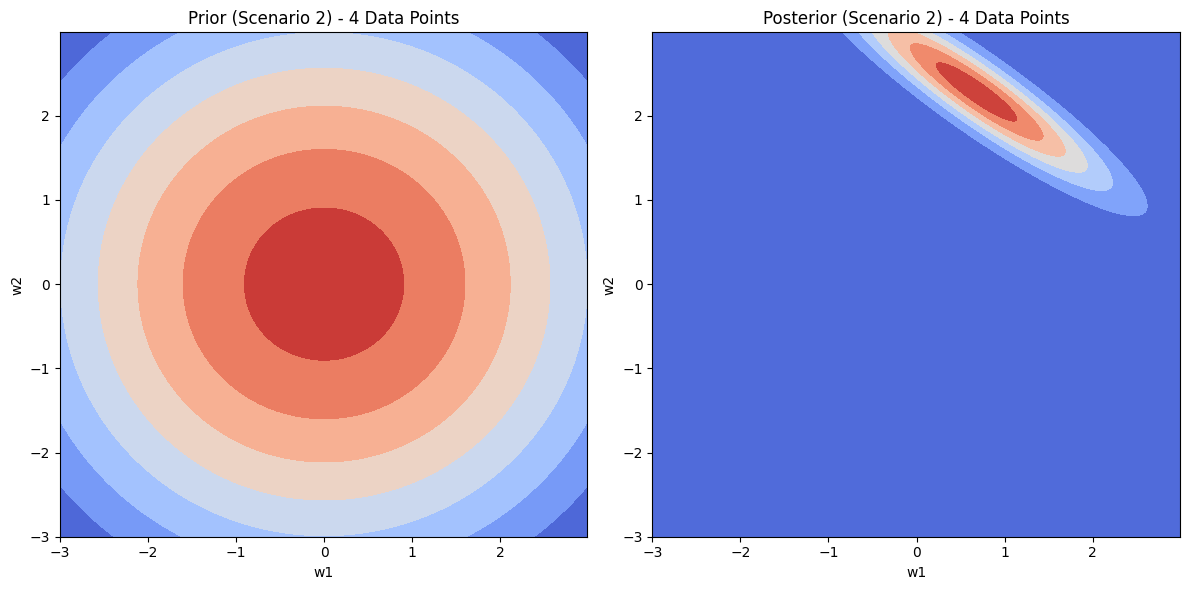

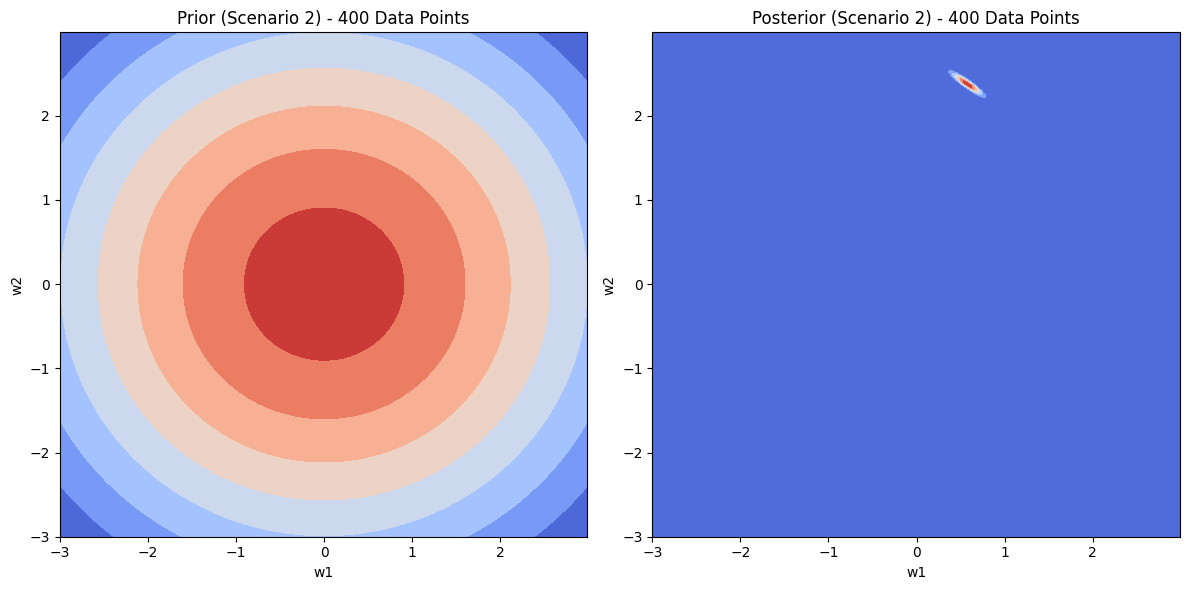

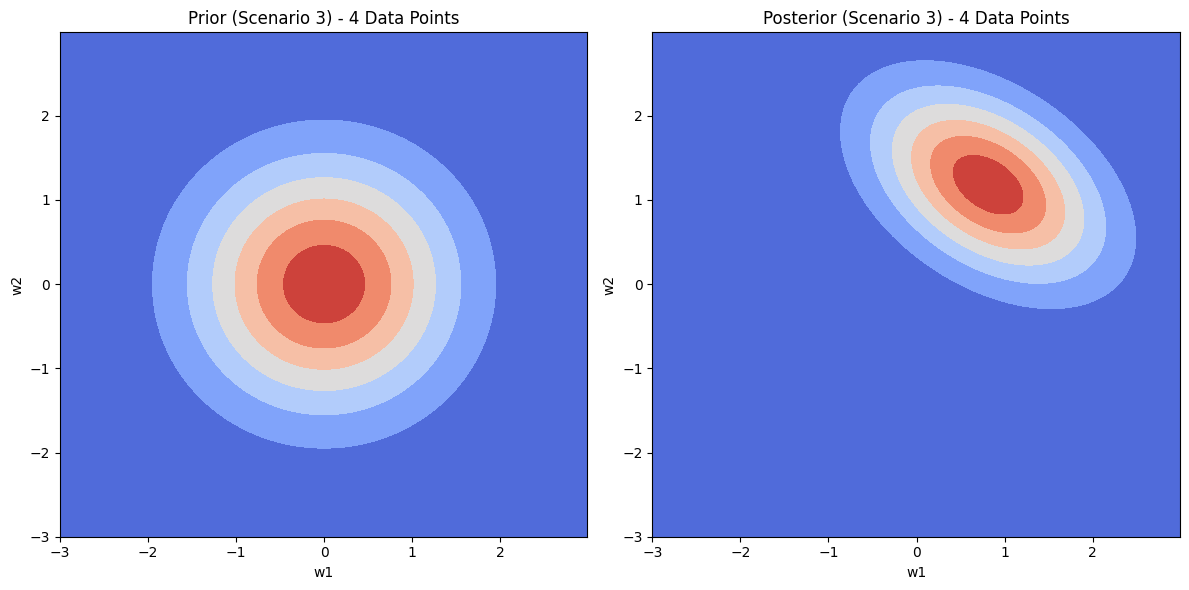

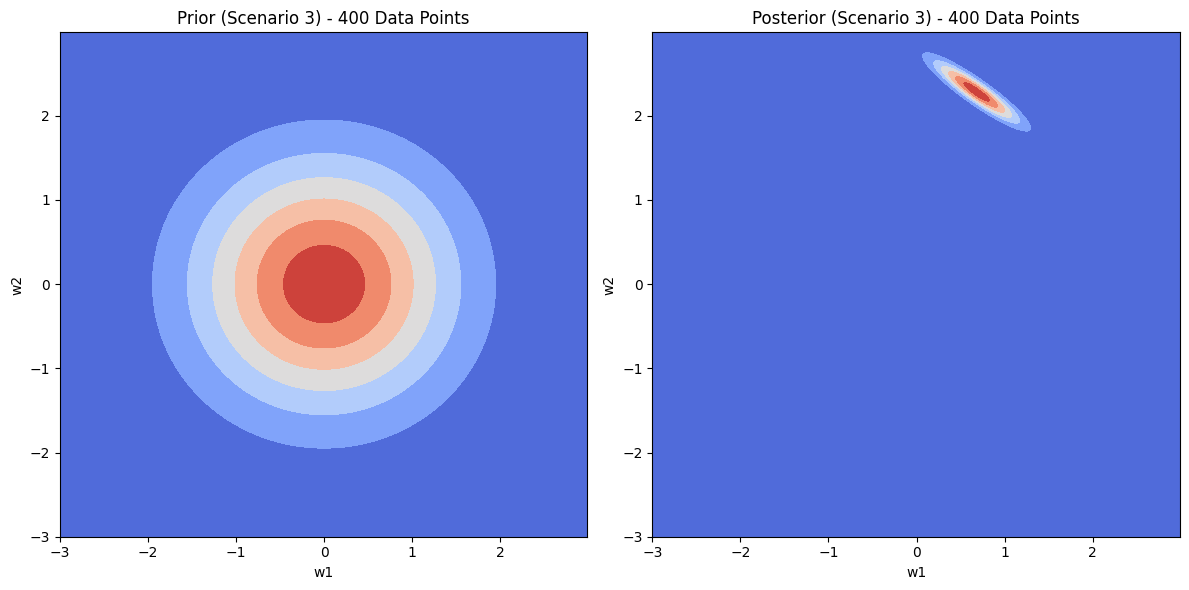

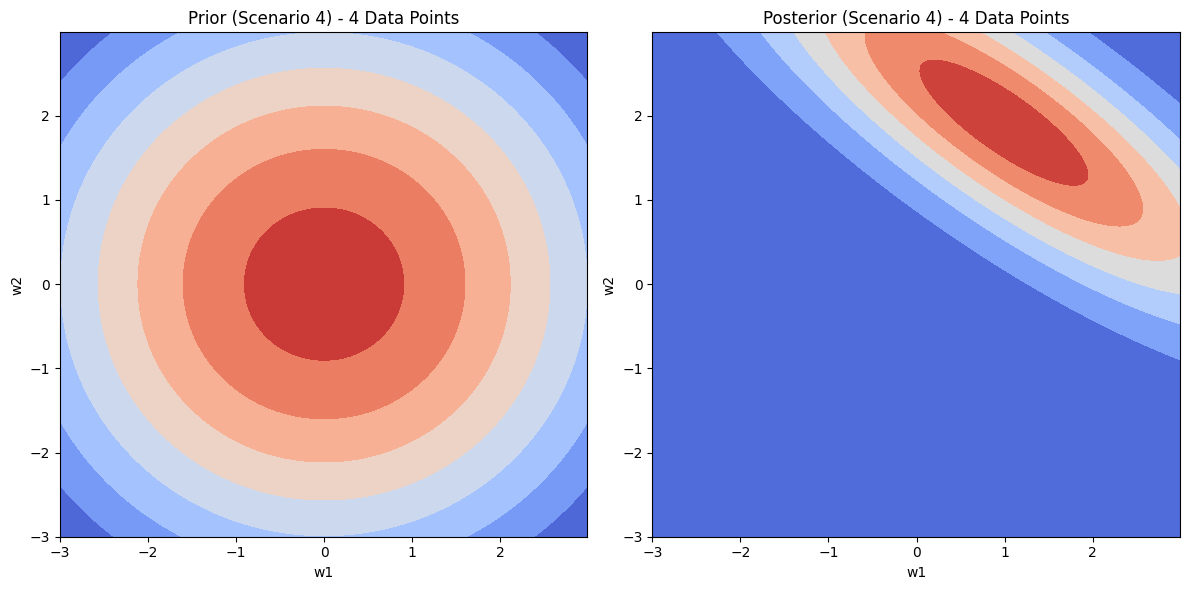

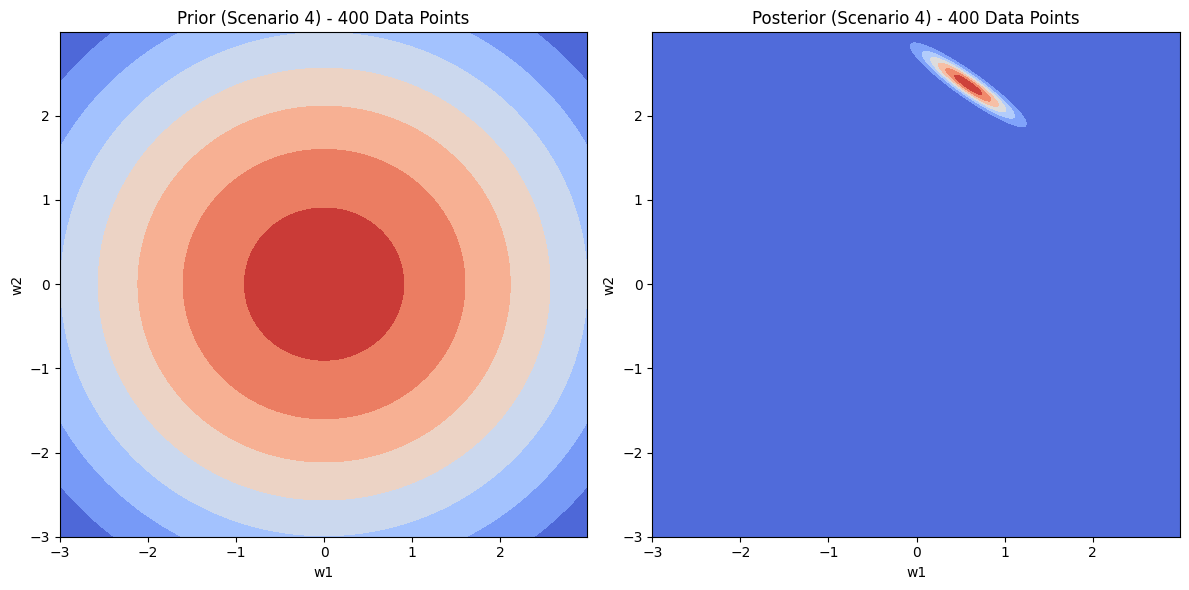

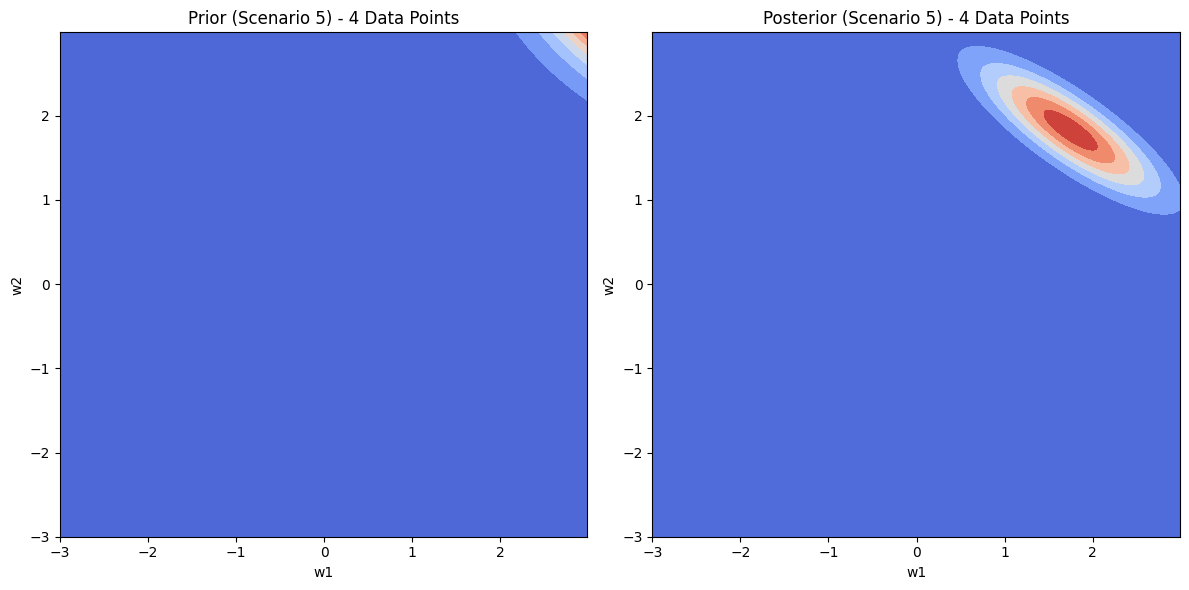

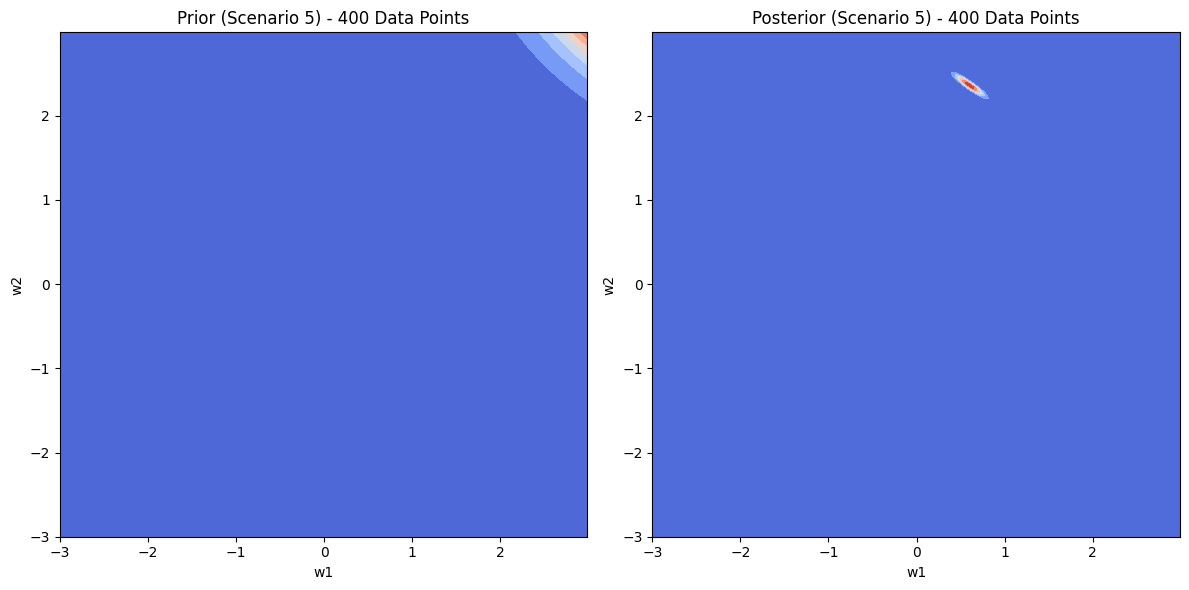

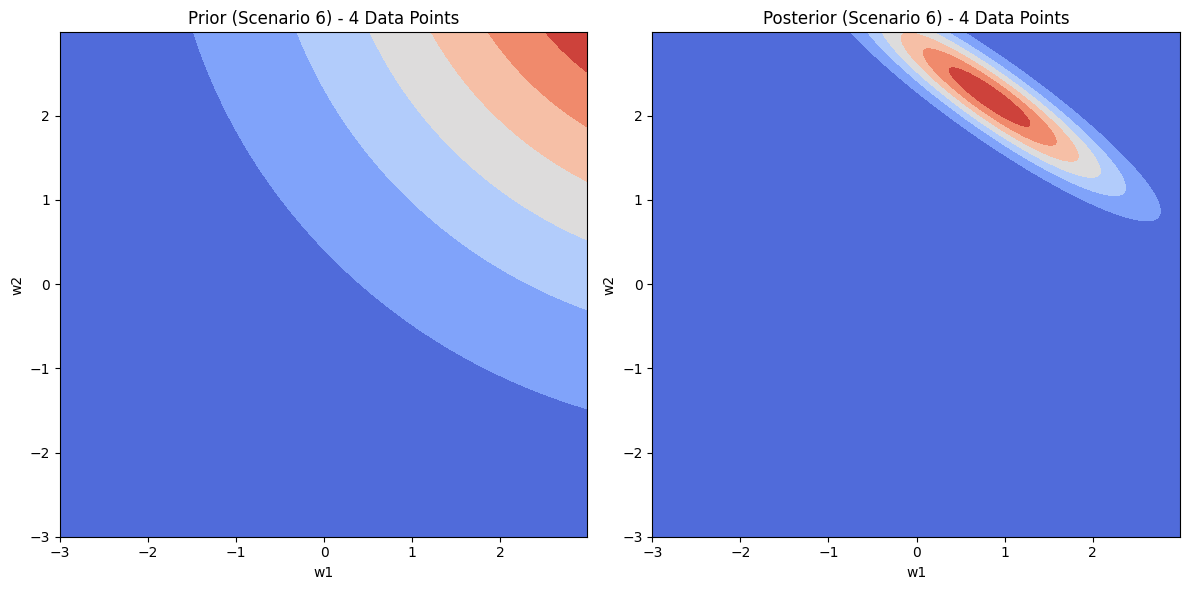

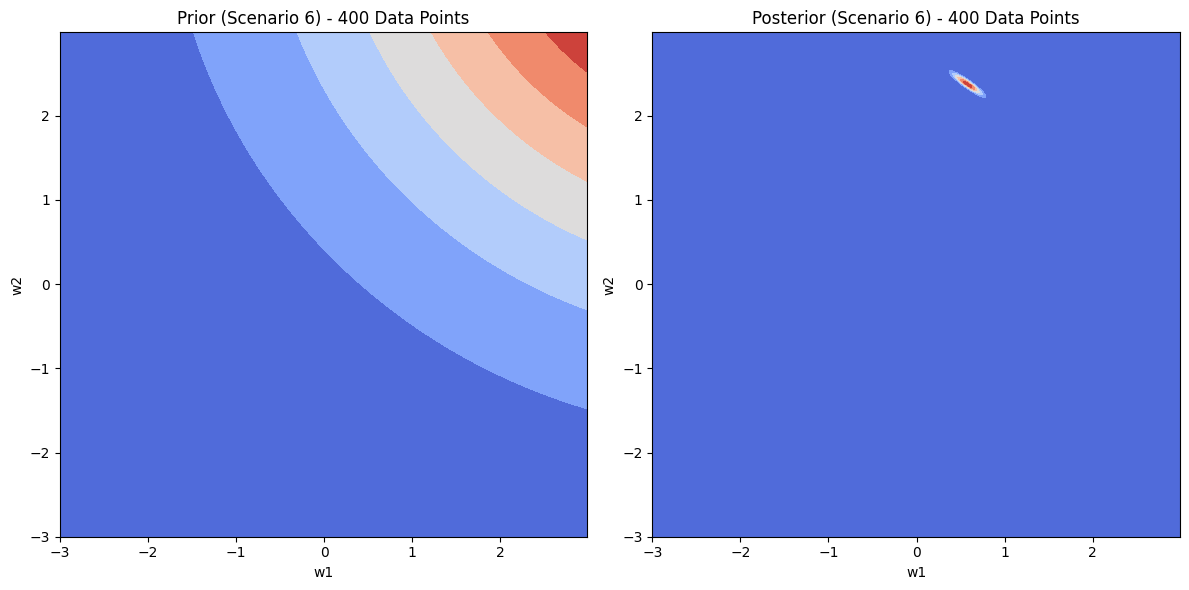

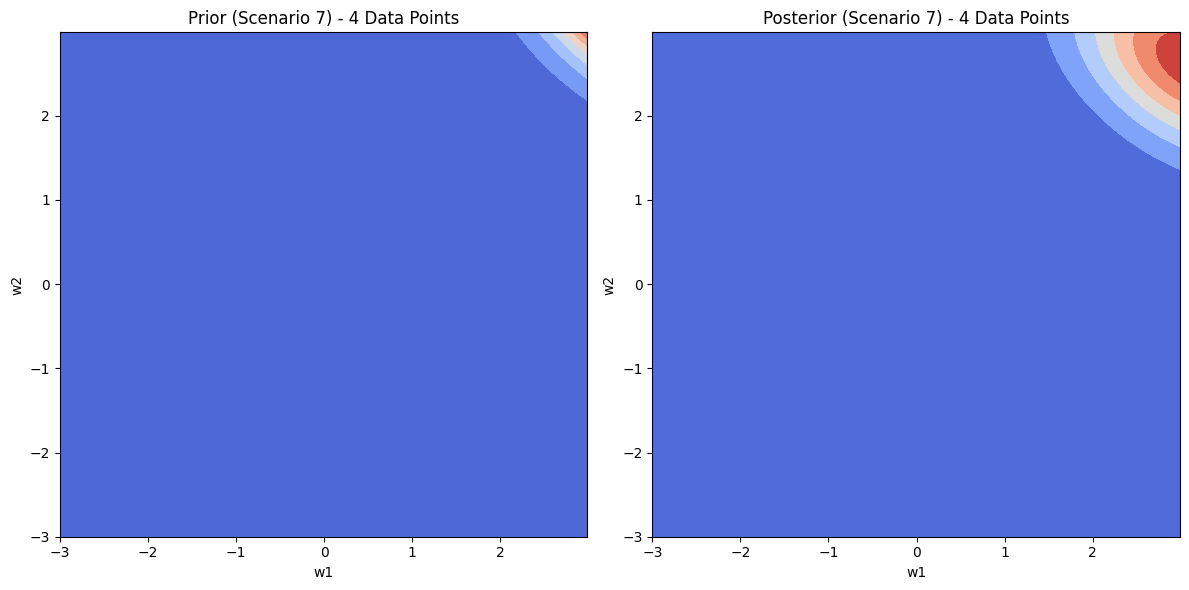

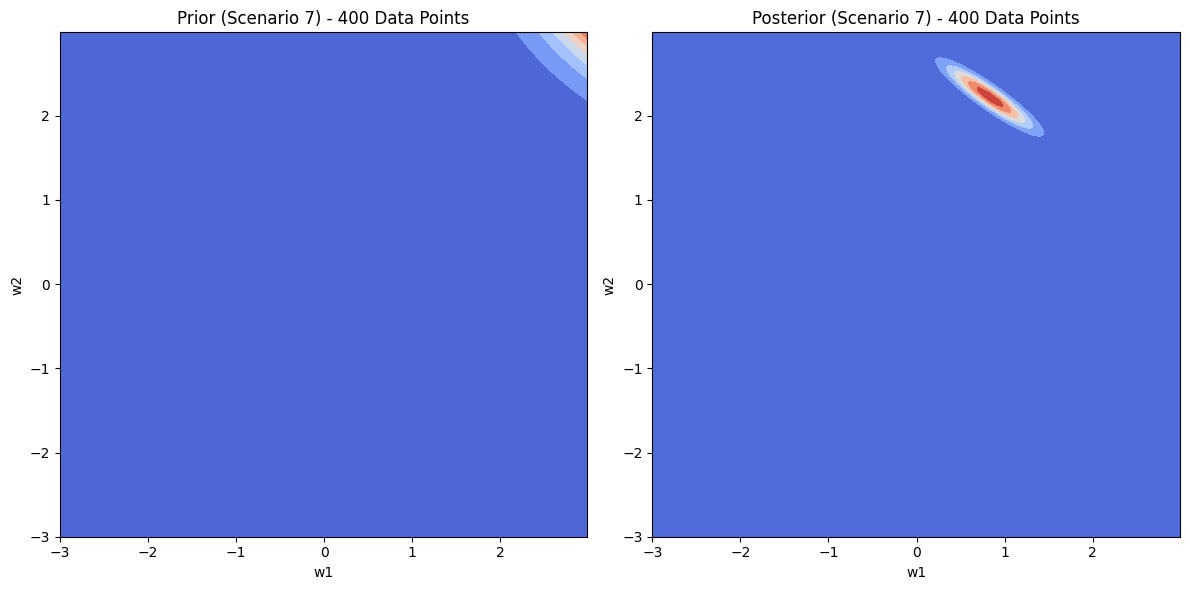

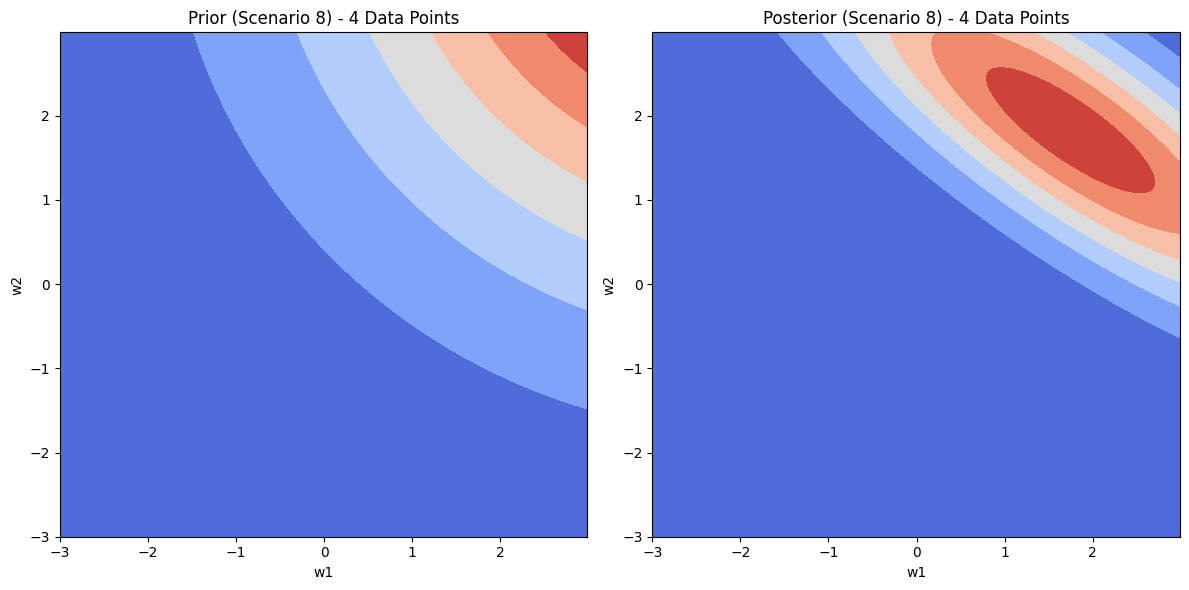

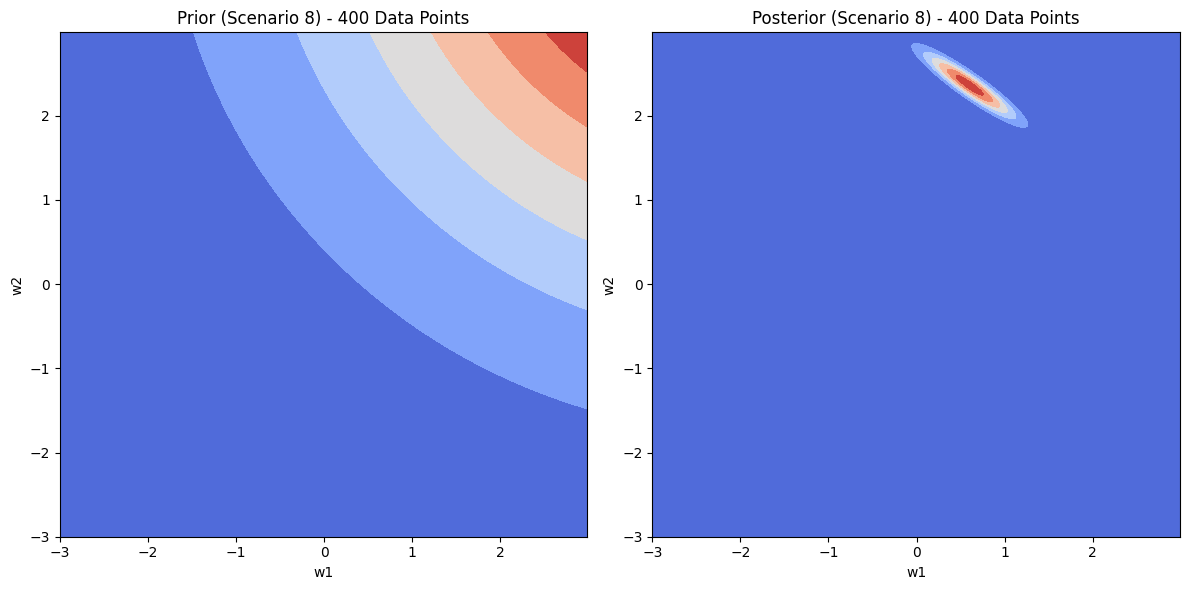

In [13]:
# Cell type : CodeWrite 
import numpy as np
import matplotlib.pyplot as plt

# Define the training data
X = np.array([[1.0, 2.0],
              [2.0, 2.1],
              [0.6, 1.5],
              [1.1, 0.9]])
y = np.array([5.1, 6.1, 4.2, 2.9])

# Replicate the data points 100 times for 400 data points
X_400 = np.tile(X, (100, 1))
y_400 = np.tile(y, 100)

# Define the scenarios
scenarios = [
    {"mu1": 0, "mu2": 0, "tau_squared": 1, "sigma_squared": 1},
    {"mu1": 0, "mu2": 0, "tau_squared": 10, "sigma_squared": 1},
    {"mu1": 0, "mu2": 0, "tau_squared": 1, "sigma_squared": 10},
    {"mu1": 0, "mu2": 0, "tau_squared": 10, "sigma_squared": 10},
    {"mu1": 5, "mu2": 5, "tau_squared": 1, "sigma_squared": 1},
    {"mu1": 5, "mu2": 5, "tau_squared": 10, "sigma_squared": 1},
    {"mu1": 5, "mu2": 5, "tau_squared": 1, "sigma_squared": 10},
    {"mu1": 5, "mu2": 5, "tau_squared": 10, "sigma_squared": 10}
]

# Plot the contours for each scenario
for i, scenario in enumerate(scenarios):
    mu_prior = np.array([scenario["mu1"], scenario["mu2"]])
    tau_squared = scenario["tau_squared"]
    sigma_squared = scenario["sigma_squared"]
    cov_prior = tau_squared * np.eye(2)

    # Calculate the posterior covariance and mean
    X_transpose_X = np.dot(X.T, X)
    posterior_cov = np.linalg.inv(np.linalg.inv(cov_prior) + (1/sigma_squared) * X_transpose_X)
    posterior_mean = np.dot(posterior_cov, np.dot(np.linalg.inv(cov_prior), mu_prior) + (1/sigma_squared) * np.dot(X.T, y))

    # Generate grid points for contour plot
    grid_x, grid_y = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.empty(grid_x.shape + (2,))
    grid[:, :, 0] = grid_x
    grid[:, :, 1] = grid_y

    # Calculate the prior and posterior probabilities for the grid points
    prior = np.exp(-0.5 * np.sum(np.dot(grid - mu_prior, np.linalg.inv(cov_prior)) * (grid - mu_prior), axis=2))
    posterior = np.exp(-0.5 * np.sum(np.dot(grid - posterior_mean, np.linalg.inv(posterior_cov)) * (grid - posterior_mean), axis=2))

    # Plot the contours
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(grid_x, grid_y, prior, cmap='coolwarm')
    plt.title(f"Prior (Scenario {i+1}) - 4 Data Points")
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.subplot(1, 2, 2)
    plt.contourf(grid_x, grid_y, posterior, cmap='coolwarm')
    plt.title(f"Posterior (Scenario {i+1}) - 4 Data Points")
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.tight_layout()
    # plt.savefig(f"scenario_{i+1}_4datapoints.png")
    plt.show()
    plt.close()

    # Repeat for 400 data points
    posterior_cov_400 = np.linalg.inv(np.linalg.inv(cov_prior) + (1/sigma_squared) * np.dot(X_400.T, X_400))
    posterior_mean_400 = np.dot(posterior_cov_400, np.dot(np.linalg.inv(cov_prior), mu_prior) + (1/sigma_squared) * np.dot(X_400.T, y_400))

    # prior_400 = np.exp
    prior_400 = np.exp(-0.5 * np.sum(np.dot(grid - mu_prior, np.linalg.inv(cov_prior)) * (grid - mu_prior), axis=2))
    posterior_400 = np.exp(-0.5 * np.sum(np.dot(grid - posterior_mean_400, np.linalg.inv(posterior_cov_400)) * (grid - posterior_mean_400), axis=2))

    # Plot the contours
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.contourf(grid_x, grid_y, prior_400, cmap='coolwarm')
    plt.title(f"Prior (Scenario {i+1}) - 400 Data Points")
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.subplot(1, 2, 2)
    plt.contourf(grid_x, grid_y, posterior_400, cmap='coolwarm')
    plt.title(f"Posterior (Scenario {i+1}) - 400 Data Points")
    plt.xlabel('w1')
    plt.ylabel('w2')

    plt.tight_layout()
    # plt.savefig(f"scenario_{i+1}_4datapoints.png")
    plt.show()
    plt.close()



**Cell type : TextRead**

# 5. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [1]:


def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    

def compute_loss(X, Y, alpha, kernel, kernel_param, reg_param):
    n = X.shape[0]
    K = compute_kernel_matrix(X, X, kernel, kernel_param)
    loss = np.sum(np.log(1 + np.exp(-Y * K.dot(alpha)))) + 0.5 * reg_param * alpha.dot(K).dot(alpha)
    return loss


def compute_kernel_matrix(X1, X2, kernel, kernel_param):
    n1, n2 = X1.shape[0], X2.shape[0]
    K = np.zeros((n1, n2))
    i, j = 0, 0
    while i < n1:
        while j < n2:
            if kernel == 'linear':
                K[i, j] = np.dot(X1[i], X2[j])
            elif kernel == 'poly':
                K[i, j] = (1 + np.dot(X1[i], X2[j])) ** kernel_param
            else:
                K[i, j] = np.exp(-kernel_param * np.linalg.norm(X1[i] - X2[j]) ** 2)
            j += 1
        i += 1
        j = 0
    return K


"""Checking for Large or Small Values: Before passing values to the sigmoid function, ensure that they are within a reasonable range to avoid overflow or underflow.
Here, techniques like clipping is used to keep them within a certain range."""
def compute_gradient(X, Y, alpha, kernel, kernel_param, reg_param):
    n = X.shape[0]
    K = compute_kernel_matrix(X, X, kernel, kernel_param)
    z = -Y * (K.dot(alpha))
    # Check for large or small values and clip them
    z = np.clip(z, -500, 500)  # Sample range to clip
    # grad = -Y * sigmoid(z).dot(K) + reg_param * K.dot(alpha)
    grad = -Y * sigmoid(-Y * (K.dot(alpha))).dot(K) + reg_param * alpha  # Adjust regularization term to prevent overflow occuring during the gradient calculation.
    return grad


def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0., kernel_param=1., num_iter_gd=100, lr=0.01):
    n, d = X.shape
    alpha = np.zeros(n)
    iter_count = 0
    while iter_count < num_iter_gd:
        grad = compute_gradient(X, Y, alpha, kernel, kernel_param, reg_param)
        alpha -= lr * grad
        iter_count += 1
    return alpha


def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):  # Return the predictions on test_X using the learned alphas
    K_test = compute_kernel_matrix(test_X, train_X, kernel, kernel_param)
    preds = np.sign(K_test.dot(alpha))
    return preds
    """Return the predictions on test_X using the learnt alphas """


In [ ]:


# Loading the classification datasets
dataset_A = np.load('../../Data/dataset_A.npz')
dataset_B = np.load('../../Data/dataset_B.npz')
X_A, Y_A = dataset_A['arr_0'], dataset_A['arr_1']
X_B, Y_B = dataset_B['arr_0'], dataset_B['arr_1']

# Define hyperparameters
kernel_types = ['linear', 'rbf', 'poly']
reg_params = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
kernel_params = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

def cross_validation(X_train, Y_train, kernel, reg_params, kernel_params, num_folds=5, num_iter_gd=100, lr=0.01):
    n = len(X_train)
    fold_size = n // num_folds
    best_error = float('inf')
    best_kernel = None
    best_kernel_param = None
    best_reg_param = None

    kernel_idx = 0
    while kernel_idx < len(kernel_types):
        kernel = kernel_types[kernel_idx]
        kernel_param_idx = 0
        while kernel_param_idx < len(kernel_params):
            kernel_param = kernel_params[kernel_param_idx]
            reg_param_idx = 0
            while reg_param_idx < len(reg_params):
                reg_param = reg_params[reg_param_idx]
                total_error = 0
                fold_idx = 0
                while fold_idx < num_folds:
                    X_val = X_train[fold_idx * fold_size: (fold_idx + 1) * fold_size]
                    Y_val = Y_train[fold_idx * fold_size: (fold_idx + 1) * fold_size]
                    X_train_fold = np.concatenate([X_train[:fold_idx * fold_size], X_train[(fold_idx + 1) * fold_size:]])
                    Y_train_fold = np.concatenate([Y_train[:fold_idx * fold_size], Y_train[(fold_idx + 1) * fold_size:]])

                    alpha = train_pred_logistic_regression(X_train_fold, Y_train_fold, kernel, reg_param, kernel_param, num_iter_gd, lr)
                    preds = test_pred(alpha, X_train_fold, Y_train_fold, X_val, kernel, kernel_param)
                    error = np.mean(preds != Y_val)
                    total_error += error

                    fold_idx += 1

                avg_error = total_error / num_folds
                if avg_error < best_error:
                    best_error = avg_error
                    best_kernel = kernel
                    best_kernel_param = kernel_param
                    best_reg_param = reg_param

                reg_param_idx += 1
            kernel_param_idx += 1
        kernel_idx += 1

    return best_kernel, best_kernel_param, best_reg_param, best_error

def split_data(X, Y, train_ratio=0.8, val_ratio=0.1, seed=None):
    if seed is not None:
        np.random.seed(seed)

    n = len(X)
    train_size = int(train_ratio * n)
    val_size = int(val_ratio * n)
    test_size = n - train_size - val_size

    indices = np.random.permutation(n)
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]

    X_train, Y_train = X[train_indices], Y[train_indices]
    X_val, Y_val = X[val_indices], Y[val_indices]
    X_test, Y_test = X[test_indices], Y[test_indices]

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

# Split the data
# Split data for datasets A and B
X_train_A, Y_train_A, X_val_A, Y_val_A, X_test_A, Y_test_A = split_data(X_A, Y_A)
X_train_B, Y_train_B, X_val_B, Y_val_B, X_test_B, Y_test_B = split_data(X_B, Y_B)

# Perform cross-validation to select the best hyperparameters for dataset A
best_kernel_A, best_reg_param_A, best_kernel_param_A, best_val_error_A = cross_validation(X_train_A, Y_train_A, kernel_types, reg_params, kernel_params)

# Perform cross-validation to select the best hyperparameters for dataset B
best_kernel_B, best_reg_param_B, best_kernel_param_B, best_val_error_B = cross_validation(X_train_B, Y_train_B, kernel_types, reg_params, kernel_params)

# Train the logistic regression model on the entire training set with the selected hyperparameters
alpha_A = train_pred_logistic_regression(X_train_A, Y_train_A, best_kernel_A, best_reg_param_A, best_kernel_param_A)
alpha_B = train_pred_logistic_regression(X_train_B, Y_train_B, best_kernel_B, best_reg_param_B, best_kernel_param_B)

# Evaluate the model on the test set for datasets A and B
preds_test_A = test_pred(alpha_A, X_train_A, Y_train_A, X_test_A, best_kernel_A, best_kernel_param_A)
test_error_A = np.mean(preds_test_A != Y_test_A)

preds_test_B = test_pred(alpha_B, X_train_B, Y_train_B, X_test_B, best_kernel_B, best_kernel_param_B)
test_error_B = np.mean(preds_test_B != Y_test_B)

# Print results
print("Dataset A:")
print(f"Best kernel: {best_kernel_A}")
print(f"Best reg_param: {best_reg_param_A}")
print(f"Best kernel_param: {best_kernel_param_A}")
print(f"Validation error: {best_val_error_A:.4f}")
print(f"Test error: {test_error_A:.4f}")

print("\nDataset B:")
print(f"Best kernel: {best_kernel_B}")
print(f"Best reg_param: {best_reg_param_B}")
print(f"Best kernel_param: {best_kernel_param_B}")
print(f"Validation error: {best_val_error_B:.4f}")
print(f"Test error: {test_error_B:.4f}")



TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  




In [ ]:
import numpy as np
import matplotlib.pyplot as plt



dataset_A = np.load('../../Data/dataset_A.npz')
dataset_B = np.load('../../Data/dataset_B.npz')
X_train_A, Y_train_A, X_train_B, Y_train_B=dataset_A['arr_0'], dataset_A['arr_1'], dataset_B['arr_0'], dataset_B['arr_1'] 


# Define the decision boundary functions for each kernel type
def linear_decision_boundary(X, alpha):
    return np.dot(X, alpha)

def rbf_decision_boundary(X, alpha, X_train):
    K = compute_kernel_matrix(X, X_train, 'rbf', best_kernel_param_B)  # Replace with actual kernel parameters
    return np.dot(K, alpha)

def polynomial_decision_boundary(X, alpha, X_train):
    K = compute_kernel_matrix(X, X_train, 'poly', best_kernel_param_A)  # Replace with actual kernel parameters
    return np.dot(K, alpha)

# Create subplots for each combination of dataset and kernel type
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot for Linear Kernel - Dataset A
axs[0, 0].scatter(X_train_A[:, 0], X_train_A[:, 1], c=Y_train_A, cmap='coolwarm')
# Compute decision boundary
decision_boundary_A = linear_decision_boundary(X_train_A, alpha_A)
axs[0, 0].contour(X_train_A[:, 0], X_train_A[:, 1], decision_boundary_A, levels=[0], colors='black')
axs[0, 0].set_title("Linear Kernel - Dataset A")

# Plot for RBF Kernel - Dataset A
axs[1, 1].scatter(X_train_A[:, 0], X_train_A[:, 1], c=Y_train_A, cmap='coolwarm')
# Compute decision boundary
decision_boundary_rbf_A = rbf_decision_boundary(X_train_A, alpha_A, X_train_A)
axs[1, 1].contour(X_train_A[:, 0], X_train_A[:, 1], decision_boundary_rbf_A, levels=[0], colors='black')
axs[1, 1].set_title("RBF Kernel - Dataset A")


# Plot for Polynomial Kernel - Dataset A
axs[2, 0].scatter(X_train_A[:, 0], X_train_A[:, 1], c=Y_train_A, cmap='coolwarm')
# Compute decision boundary
decision_boundary_poly_A = polynomial_decision_boundary(X_train_A, alpha_A, X_train_A)
axs[2, 0].contour(X_train_A[:, 0], X_train_A[:, 1], decision_boundary_poly_A, levels=[0], colors='black')
axs[2, 0].set_title("Polynomial Kernel - Dataset A")

# Repeat similar steps for other plots (Linear Kernel - Dataset B, RBF Kernel - Dataset A, etc.)

# Plot for Linear Kernel - Dataset B
axs[0, 1].scatter(X_train_B[:, 0], X_train_B[:, 1], c=Y_train_B, cmap='coolwarm')
# Compute decision boundary
decision_boundary_B = linear_decision_boundary(X_train_B, alpha_B)
axs[0, 1].contour(X_train_B[:, 0], X_train_B[:, 1], decision_boundary_B, levels=[0], colors='black')
axs[0, 1].set_title("Linear Kernel - Dataset B")

# Plot for RBF Kernel - Dataset B
axs[1, 1].scatter(X_train_B[:, 0], X_train_B[:, 1], c=Y_train_B, cmap='coolwarm')
# Compute decision boundary
decision_boundary_rbf_B = rbf_decision_boundary(X_train_B, alpha_B, X_train_B)
axs[1, 1].contour(X_train_B[:, 0], X_train_B[:, 1], decision_boundary_rbf_B, levels=[0], colors='black')
axs[1, 1].set_title("RBF Kernel - Dataset B")

# Plot for Polynomial Kernel - Dataset B
axs[2, 1].scatter(X_train_B[:, 0], X_train_B[:, 1], c=Y_train_B, cmap='coolwarm')
# Compute decision boundary
decision_boundary_poly_B = polynomial_decision_boundary(X_train_B, alpha_B, X_train_B)
axs[2, 1].contour(X_train_B[:, 0], X_train_B[:, 1], decision_boundary_poly_B, levels=[0], colors='black')
axs[2, 1].set_title("Polynomial Kernel - Dataset B")
# Repeat similar steps for other plots (RBF Kernel - Dataset A, RBF Kernel - Dataset B, etc.)



# Set labels and titles for all subplots
axs[0, 0].set_xlabel("Feature 1")
axs[0, 0].set_ylabel("Feature 2")

axs[0, 1].set_xlabel("Feature 1")
axs[0, 1].set_ylabel("Feature 2")

axs[1, 0].set_xlabel("Feature 1")
axs[1, 0].set_ylabel("Feature 2")

axs[1, 1].set_xlabel("Feature 1")
axs[1, 1].set_ylabel("Feature 2")

axs[2, 0].set_xlabel("Feature 1")
axs[2, 0].set_ylabel("Feature 2")

axs[2, 1].set_xlabel("Feature 1")
axs[2, 1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()



**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [10]:




def H_p(p):
  if p==0 or p==1:
    return 0
  return ((p*np.log(1/p)+ (1-p)*(np.log(1/(1-p)))))

class Node:
   def __init__(self, feature=None , threshold=None, left=None,right=None, value=0):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
   

class DecisionTree:
   def __init__(self,stop_split=1,max_depth=2000,criterion='accuracy'):
     self.max_depth = max_depth
     self.stop_split=stop_split
     self.root=None
     self.criterion=criterion

   def b_split(self,X,Y):
     score=0
     en=100000
     b_ftr=0
     b_thr=0
     for i in range(0,len(X[0])):
       X_now=X[:,i]      
       thresholds = np.unique(X_now)
       for j in thresholds:       
         if self.criterion =='accuracy':
           vall= 0
           cntl=0
           cntr=0
           valr=0 
           left_ids=np.argwhere(X_now<=j ).flatten()
           right_ids=np.argwhere(X_now>j ).flatten()
           if ((len(left_ids) == len(X)) or (len(right_ids) == len(X))): 
             continue
           for k in range(0,len(X)):
             val=X[k]     
             if val[i]>j:
               cntr+=1
               if Y[k]==1:
                 valr+=1
             if val[i]<=j:
               cntl+=1
               if Y[k]==1:
                 vall+=1
           sc_now = max(vall,cntl-vall) + max( valr,cntr-valr)
                     
           if sc_now>score:
             score=sc_now
             b_ftr=i
             b_thr=j
         if self.criterion =='entropy':
           left_ids=np.argwhere(X_now<=j ).flatten()
           right_ids=np.argwhere(X_now>j ).flatten()
           if ((len(left_ids) == len(X)) or (len(right_ids) == len(X))): 
             continue
           ttl=len(X) 
           lp=0
           rp=0
           for k in left_ids:
             if Y[k]==1:
               lp =lp+1
           for k in right_ids:
             if Y[k]==1:
               rp=rp+1

           val = (len(left_ids)/ttl)*H_p(lp/len(left_ids)) + (1-(len(left_ids)/ttl))*H_p(rp/len(right_ids))
           if val < en:
             en=val
             b_ftr=i
             b_thr=j


     return b_ftr,b_thr
             


   def build(self,X,Y,depth):
     self.count = (X.shape )[0]
     self.no_features= (X.shape)[1]
     if ((depth>= self.max_depth) or (len(np.unique(Y))==1 )or (self.count<self.stop_split)):
         
         pos=0
         val=0
         neg=0
         for y in Y:
           if y==1:
             pos+=1
           else:
             neg+=1
         if pos > neg :
           val=1
         else:
           val=-1        
         return Node(value=val)
     
     b_ftr,b_thr= self.b_split(X,Y)
     
     X_bst=X[:,b_ftr]
     j=b_thr
     left_ids=np.argwhere(X_bst<=j ).flatten()
     right_ids=np.argwhere(X_bst>j ).flatten()

     
     left_child=self.build(X[left_ids, :], Y[left_ids], depth + 1)
     right_child=self.build(X[right_ids, :], Y[right_ids], depth + 1)
     return Node(b_ftr,b_thr,left_child,right_child)

   def traverse_tree(self,X,node):
     if node.value != 0:
       return node.value
     if X[node.feature] > node.threshold :
       return self.traverse_tree(X,node.right)
     else:
       return self.traverse_tree(X,node.left)
     
   def train_decision_tree(self,X, Y):
     """ Returns a decision tree trained on X and Y. 
     Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
     Split criterion can be either 'accuracy' or 'entropy'.
     Returns a tree (In whatever format that you find appropriate)
     """
     self.root= self.build(X,Y,0)

    

   def eval_decision_tree(self, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    pred=[self.traverse_tree(x,self.root)for x in test_X]
    return np.array(pred)





In [11]:

from sklearn.model_selection import train_test_split
import numpy as np
dataset_A = np.load('../../Data/dataset_A.npz')
dataset_B = np.load('../../Data/dataset_B.npz')
dataset_C = np.load('../../Data/dataset_C.npz')
dataset_D = np.load('../../Data/dataset_D.npz')

X_A, Y_A = dataset_A['arr_0'], dataset_A['arr_1']
X_B, Y_B = dataset_B['arr_0'], dataset_B['arr_1']
X_C, Y_C = dataset_C['arr_0'], dataset_C['arr_1']
X_D, Y_D = dataset_D['arr_0'], dataset_D['arr_1']

# Split each dataset into training and testing sets; using a function like train_test_split from scikit-learn for this purpose

X_trainA, X_testA, Y_trainA, Y_testA = train_test_split(X_A, Y_A, test_size=0.2, random_state=42)
X_trainB, X_testB, Y_trainB, Y_testB = train_test_split(X_B, Y_B, test_size=0.2, random_state=42)
X_trainC, X_testC, Y_trainC, Y_testC = train_test_split(X_C, Y_C, test_size=0.2, random_state=42)
X_trainD, X_testD, Y_trainD, Y_testD = train_test_split(X_D, Y_D, test_size=0.2, random_state=42)
split = [10,20,50,100,200,350,500]

errorA=2000
errorB=2000
errorC=2000
errorD=2000

treeBA = DecisionTree()
treeBB= DecisionTree()
treeBC = DecisionTree()
treeBD= DecisionTree()

bsplitA=1
bsplitB=1
bsplitC=1
bsplitD=1

for i in split:
  treeA= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeA.train_decision_tree(X_trainA,Y_trainA)
  
  treeB= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeB.train_decision_tree(X_trainB,Y_trainB)

  treeC= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeC.train_decision_tree(X_trainC,Y_trainC)

  treeD= DecisionTree(stop_split=i,max_depth=20,criterion="entropy")
  treeD.train_decision_tree(X_trainD,Y_trainD)

  Y_ansA=treeA.eval_decision_tree(X_testA)
  Y_ansB=treeB.eval_decision_tree(X_testB)
  Y_ansC=treeC.eval_decision_tree(X_testC)
  Y_ansD=treeD.eval_decision_tree(X_testD)

  error_nowA=0
  error_nowB=0
  error_nowC=0
  error_nowD=0

  for j in range (0,len(Y_testA)):
    if Y_testA[j]!=Y_ansA[j] :
      error_nowA +=1
  if errorA > error_nowA :
    errorA=error_nowA
    treeBA=treeA
    bsplitA=i

  for j in range (0,len(Y_testB)):
    if Y_testB[j]!=Y_ansB[j] :
      error_nowB +=1
  if errorB > error_nowB :
    errorB=error_nowB
    treeBB=treeB
    bsplitB=i

  for j in range (0,len(Y_testC)):
    if Y_testC[j]!=Y_ansC[j] :
      error_nowC +=1
  if errorC > error_nowC :
    errorC=error_nowC
    treeBC=treeC
    bsplitC=i

  for j in range (0,len(Y_testD)):
    if Y_testD[j]!=Y_ansD[j] :
      error_nowD +=1
  if errorD > error_nowD :
    errorD=error_nowD
    treeBD=treeD
    bsplitD=i




print(bsplitA,bsplitB,bsplitC,bsplitD)

Y_ansA=treeBA.eval_decision_tree(X_testA)
Y_ansB=treeBB.eval_decision_tree(X_testA)
Y_ansC=treeBC.eval_decision_tree(X_testC)
Y_ansD=treeBD.eval_decision_tree(X_testD)

error_nowA=0
error_nowB=0
error_nowC=0
error_nowD=0

for j in range(0,len(X_testA)):
  if Y_testA[j]!=Y_ansA[j]:
    error_nowA +=1

for j in range(0,len(X_testA)):
  if Y_testA[j]!=Y_ansB[j]:
    error_nowB +=1

for j in range(0,len(X_testC)):
  if Y_testC[j]!=Y_ansC[j]:
    error_nowC +=1

for j in range(0,len(X_testD)):
  if Y_testD[j]!=Y_ansD[j]:
    error_nowD +=1



print(error_nowA,error_nowB,error_nowC,error_nowD)

Y_ansA=treeBA.eval_decision_tree(X_trainA)
Y_ansB=treeBB.eval_decision_tree(X_trainB)
Y_ansC=treeBC.eval_decision_tree(X_trainC)
Y_ansD=treeBD.eval_decision_tree(X_trainD)


error_nowA=0
error_nowB=0
error_nowC=0
error_nowD=0

for j in range(0,len(X_trainA)):
  if Y_trainA[j]!=Y_ansA[j]:
    error_nowA +=1

for j in range(0,len(X_trainB)):
  if Y_trainB[j]!=Y_ansB[j]:
    error_nowB +=1

for j in range(0,len(X_trainC)):
  if Y_trainC[j]!=Y_ansC[j]:
    error_nowC +=1

for j in range(0,len(X_trainD)):
  if Y_trainD[j]!=Y_ansD[j]:
    error_nowD +=1

print(error_nowA,error_nowB,error_nowC,error_nowD)




10 100 10 10
3 127 17 7
0 202 17 9


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  



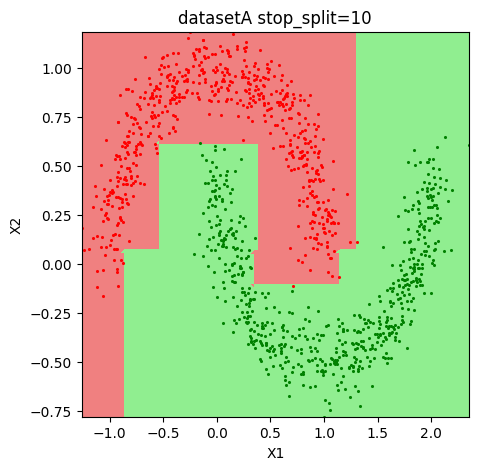

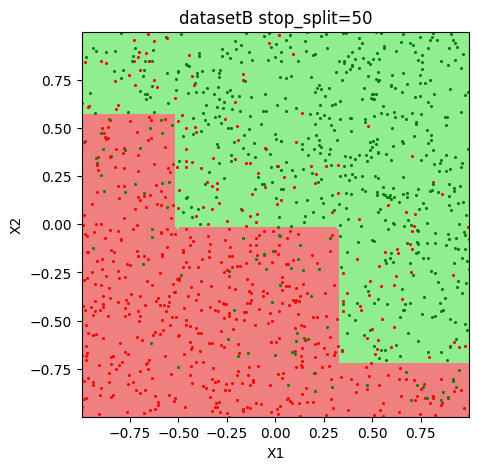

In [12]:



minX1_1=X_trainA[0][0]
minX2_1=X_trainA[0][1]
maxX1_1=X_trainA[0][0]
maxX2_1=X_trainA[0][1]

minX1_2=X_trainB[0][0]
minX2_2=X_trainB[0][1]
maxX1_2=X_trainB[0][0]
maxX2_2=X_trainB[0][1]

fig, (ax1) =plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)
for m in range(len(X_trainA)):
   minX1_1=min(minX1_1, X_trainA[m][0])
   minX2_1=min(minX2_1, X_trainA[m][1])

   maxX1_1=max(maxX1_1, X_trainA[m][0])
   maxX2_1=max(maxX2_1, X_trainA[m][1])


ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)


ftr_Z1=treeBA.eval_decision_tree(temp)

Z1=np.reshape(ftr_Z1,[100 ,100])


ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('datasetA stop_split=10')



for m in range(len(X_trainA)):
   if Y_trainA[m]==1:
     ax1.scatter(X_trainA[m][0],X_trainA[m][1],c='green',s=5,linewidth=0)
    
   else:
     ax1.scatter(X_trainA[m][0],X_trainA[m][1],c='red',s=5,linewidth=0)
plt.show() 

fig, (ax1) =plt.subplots(1, 1)
fig.set_figwidth(5)
fig.set_figheight(5)
for m in range(len(X_trainB)):
   minX1_2=min(minX1_2, X_trainB[m][0])
   minX2_2=min(minX2_2, X_trainB[m][1])

   maxX1_2=max(maxX1_2, X_trainB[m][0])
   maxX2_2=max(maxX2_2, X_trainB[m][1])


ftr_X= np.linspace(minX1_2, maxX1_2, 100)
ftr_Y= np.linspace(minX2_2, maxX2_2, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])
temp=np.array(temp)


ftr_Z1=treeBB.eval_decision_tree(temp)

Z1=np.reshape(ftr_Z1,[100 ,100])


ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])

ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('datasetB stop_split=50')



for m in range(len(X_trainB)):
   if Y_trainB[m]==1:
     ax1.scatter(X_trainB[m][0],X_trainB[m][1],c='green',s=5,linewidth=0)
    
   else:
     ax1.scatter(X_trainB[m][0],X_trainB[m][1],c='red',s=5,linewidth=0)
plt.show() 

**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [1]:
import numpy as np

class DecisionTreeNode:
    def __init__(self, left=None, right=None, split_feature=None, split_threshold=None, label=None):
        self.left = left
        self.right = right
        self.split_feature = split_feature
        self.split_threshold = split_threshold
        self.label = label

def compute_accuracy(Y):
    """ Compute accuracy given the labels Y """
    if len(Y) == 0:
        return 0.0
    return np.mean(Y == max(set(Y), key=list(Y).count))

def compute_entropy(Y):
    """ Compute entropy given the labels Y """
    if len(Y) == 0:
        return 0.0
    _, counts = np.unique(Y, return_counts=True)
    probabilities = counts / len(Y)
    return -np.sum(probabilities * np.log2(probabilities))

def find_best_split(X, Y, criterion):
    """ Find the best split for the data based on the chosen criterion """
    best_score = -np.inf if criterion == 'accuracy' else np.inf
    best_feature = None
    best_threshold = None

    num_features = X.shape[1]
    for feature in range(num_features):
        thresholds = np.unique(X[:, feature])
        for threshold_idx in range(len(thresholds)):
            threshold = thresholds[threshold_idx]
            left_indices = np.where(X[:, feature] <= threshold)[0]
            right_indices = np.where(X[:, feature] > threshold)[0]

            if len(left_indices) == 0 or len(right_indices) == 0:
                continue

            if criterion == 'accuracy':
                score = compute_accuracy(Y[left_indices]) + compute_accuracy(Y[right_indices])
            elif criterion == 'entropy':
                score = compute_entropy(Y[left_indices]) + compute_entropy(Y[right_indices])

            if (criterion == 'entropy' and score < best_score) or (criterion == 'accuracy' and score > best_score):
                best_score = score
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def build_tree(X, Y, num_nodes_stop, criterion):
    """ Recursively build the decision tree """
    if len(Y) <= num_nodes_stop:
        return DecisionTreeNode(label=np.mean(Y))

    best_feature, best_threshold = find_best_split(X, Y, criterion)

    if best_feature is None:
        return DecisionTreeNode(label=np.mean(Y))

    left_indices = np.where(X[:, best_feature] <= best_threshold)[0].astype(int)
    right_indices = np.where(X[:, best_feature] > best_threshold)[0].astype(int)

    left_subtree = build_tree(X[left_indices], Y[left_indices], num_nodes_stop, criterion)
    right_subtree = build_tree(X[right_indices], Y[right_indices], num_nodes_stop, criterion)

    return DecisionTreeNode(left=left_subtree, right=right_subtree, split_feature=best_feature, split_threshold=best_threshold)

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    """ Returns a decision tree trained on X and Y. """
    return build_tree(X, Y, num_nodes_stop, criterion)

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and returns the tree predicted values at those instances."""
    predictions = []
    for instance in test_X:
        node = tree
        while node.label is None:
            if instance[node.split_feature] <= node.split_threshold:
                node = node.left
            else:
                node = node.right
        predictions.append(node.label)
    return predictions

def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y. """
    forest = []
    num_samples = int(X.shape[0] * a)
    num_features = int(X.shape[1] * b)

    for _ in range(num_trees):
        sample_indices = np.random.choice(X.shape[0], size=num_samples, replace=False)
        feature_indices = np.random.choice(X.shape[1], size=num_features, replace=False)
        sampled_X = X[sample_indices][:, feature_indices]
        sampled_Y = Y[sample_indices]
        tree = train_decision_tree(sampled_X, sampled_Y, num_nodes_stop, criterion)
        forest.append(tree)

    return forest

def eval_random_forest(random_forest, test_X):
    """ Takes in a random forest object, and a bunch of instances X and returns the tree predicted values at those instances."""
    predictions = []
    for tree in random_forest:
        predictions.append(eval_decision_tree(tree, test_X))
    return np.array(predictions)


In [2]:

import numpy as np
from sklearn.model_selection import train_test_split
def validate_hyperparameters(X_train, Y_train, X_val, Y_val, num_trees_values, num_nodes_stop=1, criterion='accuracy'):
    """ Validate hyperparameters (num_trees) using a validation set """
    best_num_trees = None
    best_val_error = np.inf
    best_train_error = np.inf

    i = 0
    while i < len(num_trees_values):
        num_trees = num_trees_values[i]
        forest = train_random_forest(X_train, Y_train, num_trees, num_nodes_stop, criterion)
        train_predictions = np.mean(eval_random_forest(forest, X_train), axis=0)
        val_predictions = np.mean(eval_random_forest(forest, X_val), axis=0)

        train_error = np.mean(train_predictions != Y_train)
        val_error = np.mean(val_predictions != Y_val)

        if val_error < best_val_error:
            
            best_val_error = val_error
            best_train_error = train_error
            best_num_trees = num_trees
        i += 1

    return best_num_trees, best_val_error, best_train_error

#Load datasets A, B, C, and D
dataset_A = np.load('../../Data/dataset_A.npz')
dataset_B = np.load('../../Data/dataset_B.npz')
dataset_C = np.load('../../Data/dataset_C.npz')
dataset_D = np.load('../../Data/dataset_D.npz')

X_A, Y_A = dataset_A['arr_0'], dataset_A['arr_1']
X_B, Y_B = dataset_B['arr_0'], dataset_B['arr_1']
X_C, Y_C = dataset_C['arr_0'], dataset_C['arr_1']
X_D, Y_D = dataset_D['arr_0'], dataset_D['arr_1']

# Split each dataset into training and testing sets; using a function like train_test_split from scikit-learn for this purpose

X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_A, Y_A, test_size=0.2, random_state=42)
X_train_B, X_test_B, Y_train_B, Y_test_B = train_test_split(X_B, Y_B, test_size=0.2, random_state=42)
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(X_C, Y_C, test_size=0.2, random_state=42)
X_train_D, X_test_D, Y_train_D, Y_test_D = train_test_split(X_D, Y_D, test_size=0.2, random_state=42)


# a list of hyperparameters to try
num_trees_values = [10, 50, 100, 200]
criterion_values = ['accuracy', 'entropy']

# Perform grid search to find the best hyperparameters

best_hyperparameters = {}
criterion_index = 0
num_trees_index = 0

while criterion_index < len(criterion_values):
    criterion = criterion_values[criterion_index]
    while num_trees_index < len(num_trees_values):
        num_trees = num_trees_values[num_trees_index]

        # Validate hyperparameters using the validation set
        best_num_trees, val_error, _ = validate_hyperparameters(X_train_A, Y_train_A, X_test_A, Y_test_A, [num_trees], criterion=criterion)

        # Store the validation error and hyperparameters
        best_hyperparameters[(num_trees, criterion)] = val_error

        num_trees_index += 1
    criterion_index += 1


# Find the best hyperparameters with the lowest validation error
best_hyperparameters = min(best_hyperparameters, key=best_hyperparameters.get)
best_num_trees, best_criterion = best_hyperparameters

# Train the Random Forest classifier with the best hyperparameters on the entire training set
best_random_forest = train_random_forest(X_train_A, Y_train_A, num_trees=best_num_trees, criterion=best_criterion)

# Evaluate the best Random Forest classifier on the training and testing sets
train_error_A = eval_random_forest(best_random_forest, X_train_A)
test_error_A = eval_random_forest(best_random_forest, X_test_A)

# Report the results
print("Dataset A:")
print("Best number of trees:", best_num_trees)
print("Criterion:", best_criterion)
print("Train Error:", train_error_A)
print("Test Error:", test_error_A)

Dataset A:
Best number of trees: 10
Criterion: accuracy
Train Error: [[-1. -1.  1. ...  1. -1.  1.]
 [-1. -1.  1. ...  1.  1.  1.]
 [-1.  1.  1. ...  1. -1.  1.]
 ...
 [-1. -1.  1. ...  1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 [-1. -1.  1. ...  1.  1. -1.]]
Test Error: [[-1. -1.  1. ... -1. -1.  1.]
 [-1. -1.  1. ... -1. -1.  1.]
 [-1. -1.  1. ... -1. -1.  1.]
 ...
 [-1. -1.  1. ... -1. -1.  1.]
 [-1. -1.  1. ... -1. -1.  1.]
 [-1. -1.  1. ... -1. -1.  1.]]


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


Best number of trees for dataset A: 17
Best number of trees for dataset B: 12


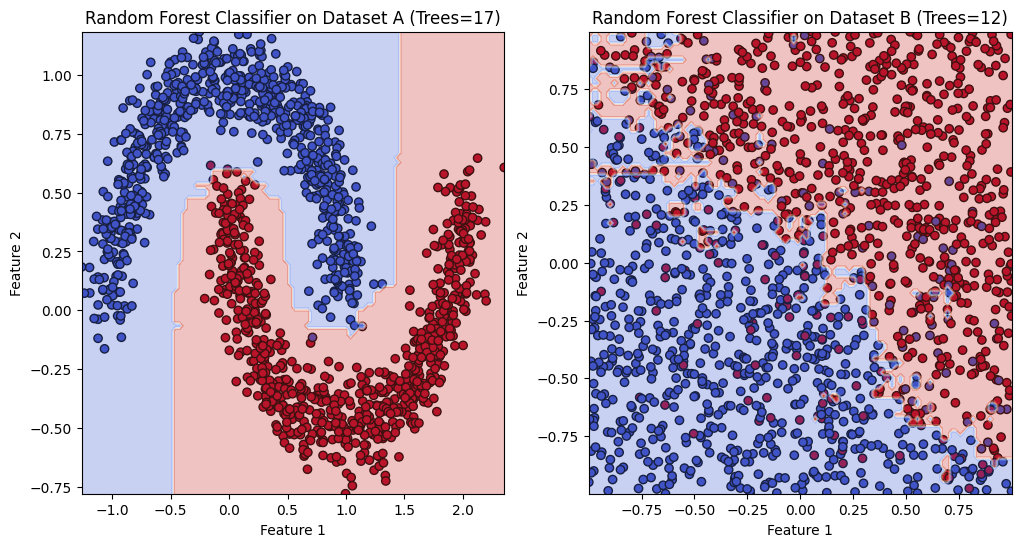

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss


dataset_A = np.load("../../Data/dataset_A.npz")
dataset_B = np.load("../../Data/dataset_B.npz")

X_A, y_A = dataset_A["arr_0"], dataset_A["arr_1"]
X_B, y_B = dataset_B["arr_0"], dataset_B["arr_1"]

# Split data into train, validation, and test sets
X_train_A, X_val_A, y_train_A, y_val_A = train_test_split(X_A, y_A, test_size=0.2, random_state=42)
X_train_B, X_val_B, y_train_B, y_val_B = train_test_split(X_B, y_B, test_size=0.2, random_state=43)
# Initialize hyperparameters
frac_data_per_tree = 0.5
frac_features_per_node = 0.5
min_nodes_to_stop = 1
# Initialize lists to store results
best_num_trees_A, best_num_trees_B = None, None

best_val_error_A, best_val_error_B = float("inf"), float("inf")
# Loop over different numbers of trees
for num_trees in range(1, 101):
    # Create a Random Forest with num_trees
    rf_A = RandomForestClassifier(n_estimators=num_trees,
                                  max_samples=frac_data_per_tree,
                                  max_features=frac_features_per_node,
                                  min_samples_leaf=min_nodes_to_stop,
                                  random_state=42)
    rf_B = RandomForestClassifier(n_estimators=num_trees,
                                  max_samples=frac_data_per_tree,
                                  max_features=frac_features_per_node,
                                  min_samples_leaf=min_nodes_to_stop,
                                  random_state=43)
    
    # Train on the training data
    rf_A.fit(X_train_A, y_train_A)
    rf_B.fit(X_train_B, y_train_B)
    
    # Evaluate on the validation set
    val_error_A = zero_one_loss(y_val_A, rf_A.predict(X_val_A))
    val_error_B = zero_one_loss(y_val_B, rf_B.predict(X_val_B))
    
    # Update best number of trees if needed
    if val_error_A < best_val_error_A:
        best_val_error_A = val_error_A
        best_num_trees_A = num_trees
    if val_error_B < best_val_error_B:
        best_val_error_B = val_error_B
        best_num_trees_B = num_trees

# Report best number of trees for datasets A and B
print(f"Best number of trees for dataset A: {best_num_trees_A}")
print(f"Best number of trees for dataset B: {best_num_trees_B}")

# Now create plots for the learned classifiers on datasets A and B
plt.figure(figsize=(12, 6))

# Plot dataset A
plt.subplot(1, 2, 1)
plt.scatter(X_A[:, 0], X_A[:, 1], c=y_A, cmap="coolwarm", marker="o", edgecolors="k")
plt.title(f"Random Forest Classifier on Dataset A (Trees={best_num_trees_A})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
xx_A, yy_A = np.meshgrid(np.linspace(X_A[:, 0].min(), X_A[:, 0].max(), 100),
                         np.linspace(X_A[:, 1].min(), X_A[:, 1].max(), 100))
Z_A = rf_A.predict(np.c_[xx_A.ravel(), yy_A.ravel()]).reshape(xx_A.shape)
plt.contourf(xx_A, yy_A, Z_A, alpha=0.3, cmap="coolwarm")

# Plot dataset B
plt.subplot(1, 2, 2)
plt.scatter(X_B[:, 0], X_B[:, 1], c=y_B, cmap="coolwarm", marker="o", edgecolors="k")
plt.title(f"Random Forest Classifier on Dataset B (Trees={best_num_trees_B})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
xx_B, yy_B = np.meshgrid(np.linspace(X_B[:, 0].min(), X_B[:, 0].max(), 100),
                         np.linspace(X_B[:, 1].min(), X_B[:, 1].max(), 100))
Z_B = rf_B.predict(np.c_[xx_B.ravel(), yy_B.ravel()]).reshape(xx_B.shape)
plt.contourf(xx_B, yy_B, Z_B, alpha=0.3, cmap="coolwarm")

plt.show()


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:

from sklearn.model_selection import train_test_split
import numpy as np
dataset_A = np.load('../../Data/dataset_A.npz')
dataset_B = np.load('../../Data/dataset_B.npz')
dataset_C = np.load('../../Data/dataset_C.npz')
dataset_D = np.load('../../Data/dataset_D.npz')
X_A, Y_A = dataset_A['arr_0'], dataset_A['arr_1']
X_B, Y_B = dataset_B['arr_0'], dataset_B['arr_1']
X_C, Y_C = dataset_C['arr_0'], dataset_C['arr_1']
X_D, Y_D = dataset_D['arr_0'], dataset_D['arr_1']
X_trainA, X_testA, Y_trainA, Y_testA = train_test_split(X_A, Y_A, test_size=0.2, random_state=42)
X_trainB, X_testB, Y_trainB, Y_testB = train_test_split(X_B, Y_B, test_size=0.2, random_state=42)
X_trainC, X_testC, Y_trainC, Y_testC = train_test_split(X_C, Y_C, test_size=0.2, random_state=42)
X_trainD, X_testD, Y_trainD, Y_testD = train_test_split(X_D, Y_D, test_size=0.2, random_state=42)
class Node:
   def __init__(self, feature=None , threshold=None, left=None,right=None, value=0):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
   

class DecisionTree:
   def __init__(self,stop_split=1,max_depth=2000,criterion='accuracy'):
     self.max_depth = max_depth
     self.stop_split=stop_split
     self.root=None
     self.criterion=criterion

   def b_split(self, X, Y, W):
    score = 0
    b_ftr = 0
    b_thr = 0
    i = 0
    while i < len(X[0]):
        X_now = X[:, i]
        thresholds = np.unique(X_now)
        j = 0
        while j < len(thresholds):
            if self.criterion == 'accuracy':
                vall = 0
                cntl = 0
                cntr = 0
                valr = 0
                left_ids = np.argwhere(X_now <= thresholds[j]).flatten()
                right_ids = np.argwhere(X_now > thresholds[j]).flatten()
                if len(left_ids) == len(X) or len(right_ids) == len(X):
                    j += 1
                    continue
                k = 0
                while k < len(X):
                    val = X[k]
                    if val[i] > thresholds[j]:
                        cntr += W[k]
                        if Y[k] == 1:
                            valr += W[k]
                    if val[i] <= thresholds[j]:
                        cntl += W[k]
                        if Y[k] == 1:
                            vall += W[k]
                    k += 1
                sc_now = max(vall, cntl - vall) + max(valr, cntr - valr)
                if sc_now > score:
                    score = sc_now
                    b_ftr = i
                    b_thr = thresholds[j]
            j += 1
        i += 1
    return b_ftr, b_thr

             


   def build(self,X,Y,W,depth):    
     self.count = (X.shape )[0]
     self.no_features= (X.shape)[1]
     if ((depth>= self.max_depth) or (len(np.unique(Y))==1 )or (self.count<self.stop_split)):
         
         pos=0
         val=0
         neg=0
         
         for y in range(0,len(Y)):
           if Y[y]==1:
             pos= pos + W[y]
           else:
             neg= neg + W[y]
         if pos > neg :
           val=1
         else:
           val=-1        
         return Node(value=val)
     
     b_ftr,b_thr= self.b_split(X,Y,W)
     
     X_bst=X[:,b_ftr]
     j=b_thr
     left_ids=np.argwhere(X_bst<=j ).flatten()
     right_ids=np.argwhere(X_bst>j ).flatten()
     
     
     left_child=self.build(X[left_ids, :], Y[left_ids],W[left_ids] ,depth + 1)
     right_child=self.build(X[right_ids, :], Y[right_ids],W[right_ids], depth + 1)
     return Node(b_ftr,b_thr,left_child,right_child)

   def traverse_tree(self,X,node):
     if node.value != 0:
       return node.value
     if X[node.feature] > node.threshold :
       return self.traverse_tree(X,node.right)
     else:
       return self.traverse_tree(X,node.left)
     
   def train_decision_tree(self,X, Y,W):
     """ Returns a decision tree trained on X and Y. 
     Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
     Split criterion can be either 'accuracy' or 'entropy'.
     Returns a tree (In whatever format that you find appropriate)
     """
     self.root= self.build(X,Y,W,0)

    

   def eval_decision_tree(self, test_X):
    """ Takes in a tree, and a bunch of instances X and 
    returns the tree predicted values at those instances."""
    pred=[self.traverse_tree(x,self.root)for x in test_X]
    return np.array(pred)



def ada_boost(X_train, Y_train, X_test, Y_test, depth):
    X = X_train
    Y = Y_train
    g_x_train = []  # contains logarithmic values
    g_x_test = []
    W = []

    i = 0
    while i < len(X_train):
        W.append(1)
        g_x_train.append(0)
        i += 1

    i = 0
    while i < len(X_test):
        g_x_test.append(0)
        i += 1

    train_acc = []
    test_acc = []
    q = 0
    while q < 30:
        W = np.array(W)

        tree = DecisionTree(max_depth=depth)
        tree.train_decision_tree(X, Y, W)
        Y_pred = tree.eval_decision_tree(X)
        sc = 0
        sum = 0
        y = 0
        while y < len(Y_pred):
            sum += W[y]
            if Y[y] == Y_pred[y]:
                sc = sc + W[y]
            y += 1
        weight = (sc / (sum - sc))
        Y_trained = tree.eval_decision_tree(X_train)
        Y_tested = tree.eval_decision_tree(X_test)

        tr_acc = 0
        te_acc = 0
        i = 0
        while i < len(X_train):
            g_x_train[i] = g_x_train[i] + (Y_trained[i]) * (np.log(weight))
            if Y_train[i] == np.sign(g_x_train[i]):
                tr_acc = tr_acc + 1
            i += 1

        i = 0
        while i < len(X_test):
            g_x_test[i] = g_x_test[i] + (Y_tested[i]) * (np.log(weight))
            if Y_test[i] == np.sign(g_x_test[i]):
                te_acc = te_acc + 1
            i += 1

        train_acc.append(tr_acc / len(X_train))
        test_acc.append(te_acc / len(X_test))

        i = 0
        while i < len(X):
            if Y_pred[i] != Y[i]:
                W[i] = (W[i] * int(weight))
            i += 1

        q += 1

    return tree, train_acc, test_acc


treeA1,train_accA1,test_accA1=ada_boost(X_trainA,Y_trainA,X_testA,Y_testA,0)
treeA2,train_accA2,test_accA2=ada_boost(X_trainA,Y_trainA,X_testA,Y_testA,2)
treeA3,train_accA3,test_accA3=ada_boost(X_trainA,Y_trainA,X_testA,Y_testA,6)


treeB1,train_accB1,test_accB1=ada_boost(X_trainB,Y_trainB,X_testB,Y_testB,0)
treeB2,train_accB2,test_accB2=ada_boost(X_trainB,Y_trainB,X_testB,Y_testB,2)
treeB3,train_accB3,test_accB3=ada_boost(X_trainB,Y_trainB,X_testB,Y_testB,6)


treeC1,train_accC1,test_accC1=ada_boost(X_trainC,Y_trainC,X_testC,Y_testC,0)
treeC2,train_accC2,test_accC2=ada_boost(X_trainC,Y_trainC,X_testC,Y_testC,2)
treeC3,train_accC3,test_accC3=ada_boost(X_trainC,Y_trainC,X_testC,Y_testC,6)

treeD1,train_accD1,test_accD1=ada_boost(X_trainD,Y_trainD,X_testD,Y_testD,0)
treeD2,train_accD2,test_accD2=ada_boost(X_trainD,Y_trainD,X_testD,Y_testD,2)
treeD3,train_accD3,test_accD3=ada_boost(X_trainD,Y_trainD,X_testD,Y_testD,6)


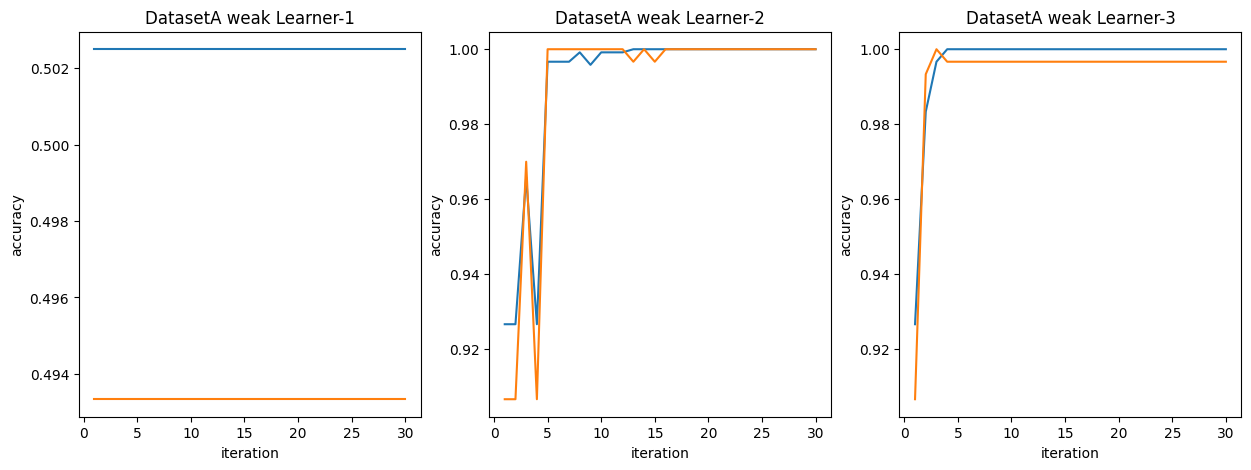

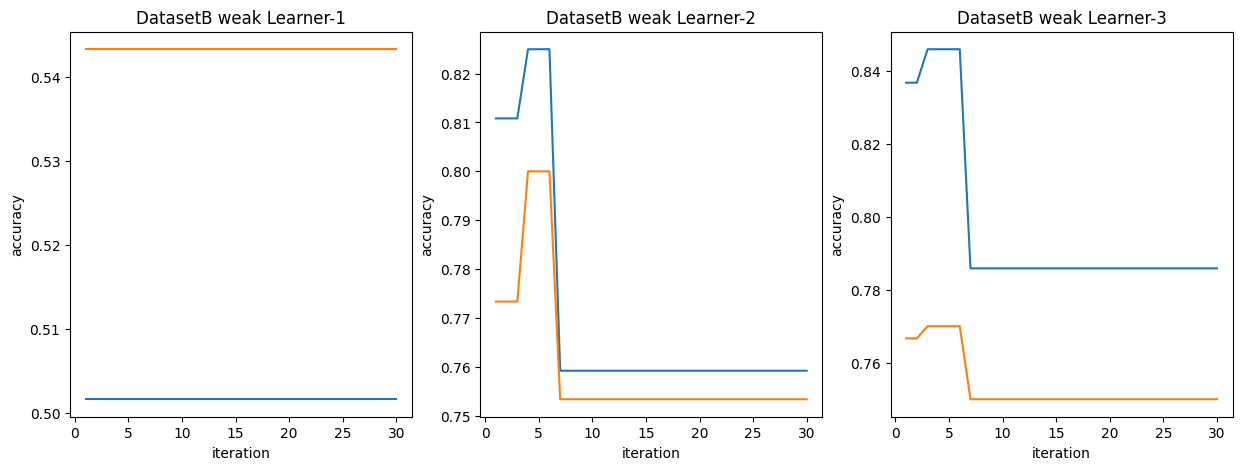

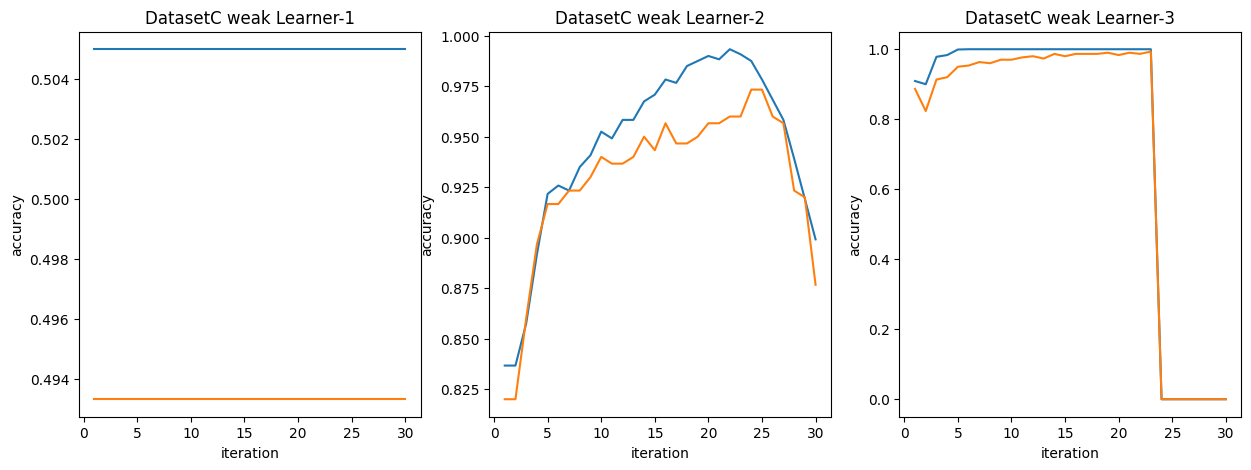

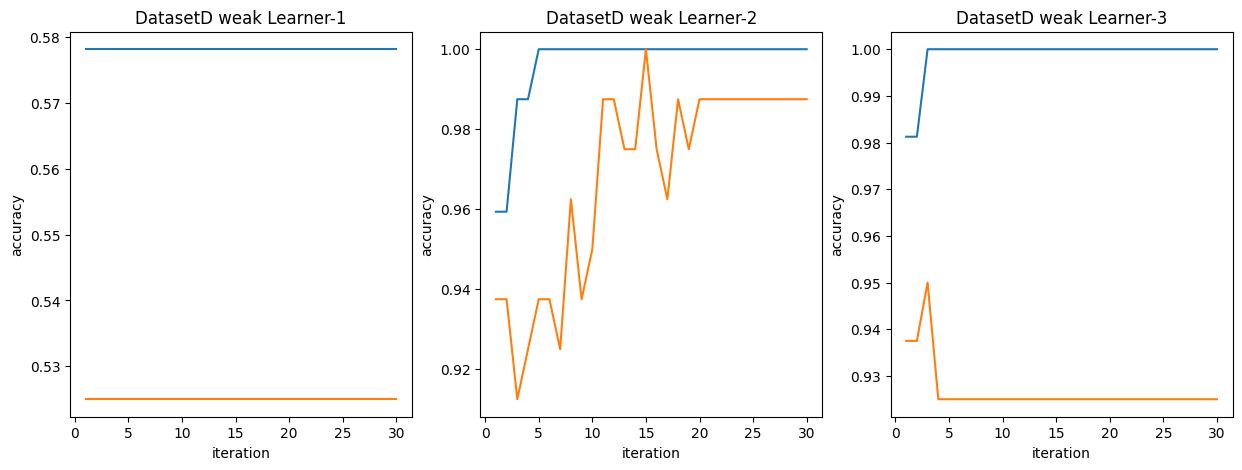

In [13]:


import matplotlib.pyplot as plt
X=[]
for i in range(1,31):
  X.append(i)
X=np.array(X)


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetA weak Learner-1')
ax1.plot(X,train_accA1)
ax1.plot(X,test_accA1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetA weak Learner-2')

ax2.plot(X,train_accA2)
ax2.plot(X,test_accA2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetA weak Learner-3')
ax3.plot(X,train_accA3)
ax3.plot(X,test_accA3)

plt.show()

#datasetB


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetB weak Learner-1')
ax1.plot(X,train_accB1)
ax1.plot(X,test_accB1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetB weak Learner-2')

ax2.plot(X,train_accB2)
ax2.plot(X,test_accB2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetB weak Learner-3')
ax3.plot(X,train_accB3)
ax3.plot(X,test_accB3)

plt.show()
#dataset-3
fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetC weak Learner-1')
ax1.plot(X,train_accC1)
ax1.plot(X,test_accC1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetC weak Learner-2')

ax2.plot(X,train_accC2)
ax2.plot(X,test_accC2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetC weak Learner-3')
ax3.plot(X,train_accC3)
ax3.plot(X,test_accC3)

plt.show()

fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)

ax1.set_xlabel('iteration')
ax1.set_ylabel('accuracy')
ax1.set_title('DatasetD weak Learner-1')
ax1.plot(X,train_accD1)
ax1.plot(X,test_accD1)

ax2.set_xlabel('iteration')
ax2.set_ylabel('accuracy')
ax2.set_title('DatasetD weak Learner-2')

ax2.plot(X,train_accD2)
ax2.plot(X,test_accD2)

ax3.set_xlabel('iteration')
ax3.set_ylabel('accuracy')
ax3.set_title('DatasetD weak Learner-3')
ax3.plot(X,train_accD3)
ax3.plot(X,test_accD3)

plt.show()




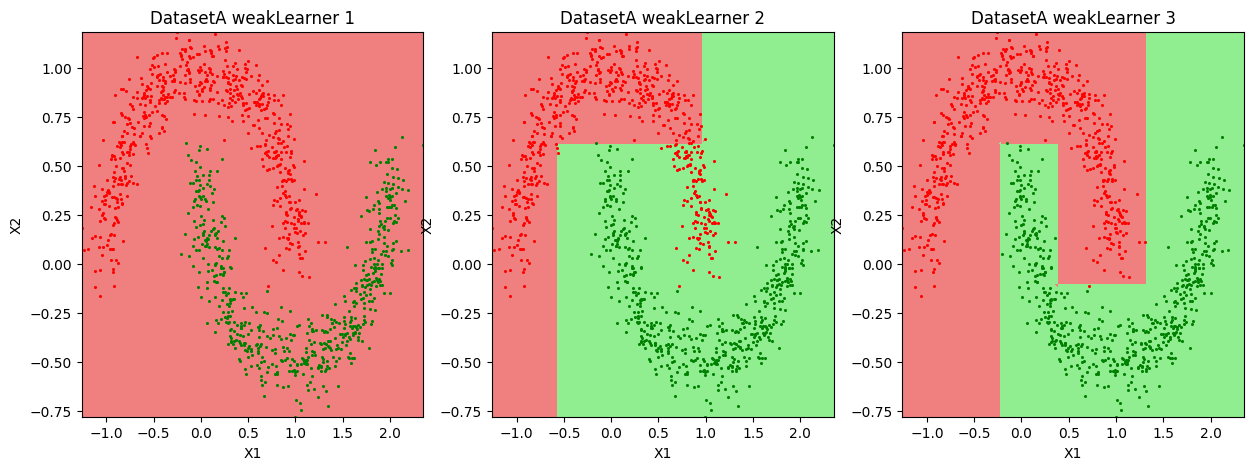

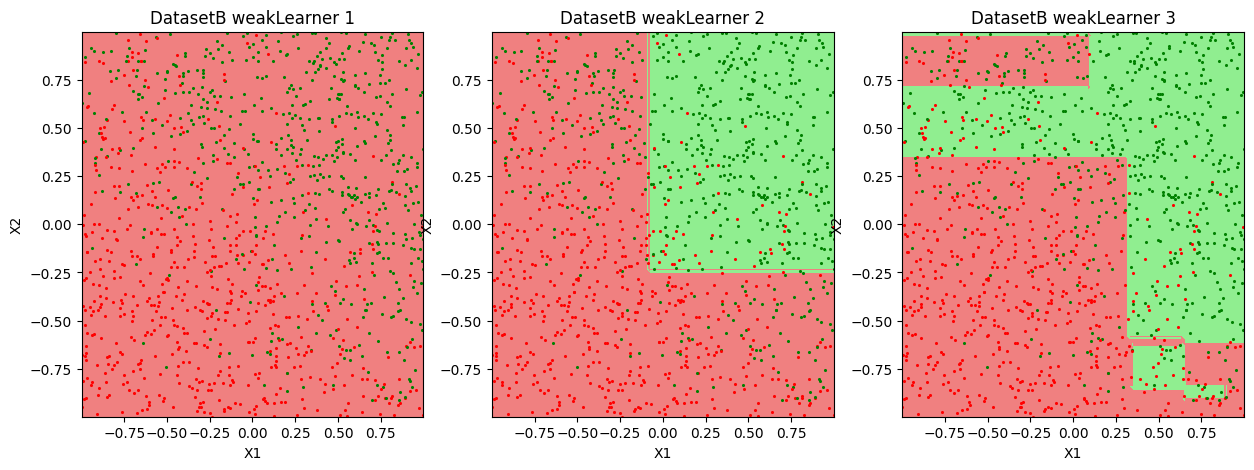

In [14]:


minX1_1=X_trainA[0][0]
minX2_1=X_trainA[0][1]
maxX1_1=X_trainA[0][0]
maxX2_1=X_trainA[0][1]


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_trainA)):
   minX1_1=min(minX1_1, X_trainA[m][0])
   minX2_1=min(minX2_1, X_trainA[m][1])

   maxX1_1=max(maxX1_1, X_trainA[m][0])
   maxX2_1=max(maxX2_1, X_trainA[m][1])
   
  
     

ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = treeA1.eval_decision_tree(temp)
ftr_Z2 = treeA2.eval_decision_tree(temp)
ftr_Z3 = treeA3.eval_decision_tree(temp)
   

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('DatasetA weakLearner 1')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('DatasetA weakLearner 2')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('DatasetA weakLearner 3')

for m in range(len(X_trainA)):
   if Y_trainA[m]==1:
     ax1.scatter(X_trainA[m][0],X_trainA[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_trainA[m][0],X_trainA[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_trainA[m][0],X_trainA[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_trainA[m][0],X_trainA[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_trainA[m][0],X_trainA[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_trainA[m][0],X_trainA[m][1],c='red',s=5,linewidth=0)

plt.show() 


#for datasetB

minX1_1=X_trainB[0][0]
minX2_1=X_trainB[0][1]
maxX1_1=X_trainB[0][0]
maxX2_1=X_trainB[0][1]


fig, (ax1, ax2, ax3) =plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
for m in range(len(X_trainB)):
   minX1_1=min(minX1_1, X_trainB[m][0])
   minX2_1=min(minX2_1, X_trainB[m][1])

   maxX1_1=max(maxX1_1, X_trainB[m][0])
   maxX2_1=max(maxX2_1, X_trainB[m][1])
   
  
     

ftr_X= np.linspace(minX1_1, maxX1_1, 100)
ftr_Y= np.linspace(minX2_1, maxX2_1, 100)

[X1, Y1] = np.meshgrid(ftr_X, ftr_Y)

temp=[]
for i in range(100):
  for j in range(100):
    temp.append([X1[i][j], Y1[i][j]])

ftr_Z1 = treeB1.eval_decision_tree(temp)
ftr_Z2 = treeB2.eval_decision_tree(temp)
ftr_Z3 = treeB3.eval_decision_tree(temp)
   

Z1=np.reshape(ftr_Z1,[100 ,100])
Z2=np.reshape(ftr_Z2,[100 ,100])
Z3=np.reshape(ftr_Z3,[100 ,100])

ax1.contourf(X1, Y1, Z1,colors=['lightcoral', 'lightgreen'])
ax2.contourf(X1, Y1, Z2,colors=['lightcoral', 'lightgreen'])
ax3.contourf(X1, Y1, Z3,colors=['lightcoral', 'lightgreen'])
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('DatasetB weakLearner 1')

ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_title('DatasetB weakLearner 2')

ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_title('DatasetB weakLearner 3')

for m in range(len(X_trainB)):
   if Y_trainB[m]==1:
     ax1.scatter(X_trainB[m][0],X_trainB[m][1],c='green',s=5,linewidth=0)
     ax2.scatter(X_trainB[m][0],X_trainB[m][1],c='green',s=5,linewidth=0)
     ax3.scatter(X_trainB[m][0],X_trainB[m][1],c='green',s=5,linewidth=0)
   else:
     ax1.scatter(X_trainB[m][0],X_trainB[m][1],c='red',s=5,linewidth=0)
     ax2.scatter(X_trainB[m][0],X_trainB[m][1],c='red',s=5,linewidth=0)
     ax3.scatter(X_trainB[m][0],X_trainB[m][1],c='red',s=5,linewidth=0)

plt.show() 

Textwrite cell:

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set. 

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional). 




In [23]:
# Coderead cell

import numpy as np

def projection_oracle_l1(w, l1_norm):
    signs = np.sign(w)
    w = w * signs
    # Project this modified w onto the simplex in the first orthant.
    d = len(w)
    # If w is already in the l1 norm ball, return it as it is.
    if np.sum(w) <= l1_norm:
        return w * signs

    # Using 1e-7 as zero here to avoid floating point issues
    while np.sum(w) > l1_norm:
        w_next = w.copy()
        w_next[w > 1e-7] = w[w > 1e-7] - np.min(w[w > 1e-7])
        if np.sum(w_next) <= l1_norm:
            w = ((l1_norm - np.sum(w_next)) * w + (np.sum(w) - l1_norm) * w_next) / (np.sum(w) - np.sum(w_next))
            return w * signs
        else:
            w = w_next

# Test the above code
w = np.array([1., 2, 3, 4])
l1_norm = 2
print("Projected vector:", projection_oracle_l1(w, l1_norm))
# Projecting the vector (1, 2, 3, 4) onto the l1 norm ball of radius 2 will give (0, 0, 0.5, 1.5)

def lasso_regression_loss(X, y, w, lmbda):
    """Compute Lasso Regression loss"""
    num_instances = X.shape[0]
    residuals = y - X.dot(w)
    loss = 0.5 * np.mean(residuals**2) + lmbda * np.linalg.norm(w, ord=1)
    return loss

def lasso_regression_gradient(X, y, w, lmbda):
    """Compute gradient of Lasso Regression loss"""
    num_instances = X.shape[0]
    residuals = y - X.dot(w)
    gradient = -X.T.dot(residuals) / num_instances + lmbda * np.sign(w)
    return gradient

def projected_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, lmbda, max_iterations=1000, tolerance=1e-5):
    """Projected Gradient Descent for Lasso Regression"""
    num_features = X_train.shape[1]
    w = np.zeros(num_features)
    losses_train = []
    losses_val = []

    iteration = 0
    while iteration < max_iterations:
        # Compute gradient
        gradient = lasso_regression_gradient(X_train, y_train, w, lmbda)

        # Update weights
        w -= learning_rate * gradient

        # Project onto L1 norm ball
        w = projection_oracle_l1(w, lmbda)  # Use your projection function here

        # Compute training and validation loss
        loss_train = lasso_regression_loss(X_train, y_train, w, lmbda)
        loss_val = lasso_regression_loss(X_val, y_val, w, lmbda)

        losses_train.append(loss_train)
        losses_val.append(loss_val)

        # Check for convergence
        if iteration > 0 and np.abs(losses_train[-1] - losses_train[-2]) < tolerance:
            break

        iteration += 1

    return w, losses_train, losses_val


Projected vector: [0.  0.  0.5 1.5]


In [24]:


# Load the dataset
data = np.load('../../Data/LassoReg_data.npz')
X, y = data['arr_0'], data['arr_1']

# Split the data into train-validation-test sets (50-25-25 ratio)
num_instances = X.shape[0]
num_train = num_instances // 2
num_val = (num_instances - num_train) // 2
num_test = num_instances - num_train - num_val

X_train, y_train = X[:num_train], y[:num_train]
X_val, y_val = X[num_train:num_train + num_val], y[num_train:num_train + num_val]
X_test, y_test = X[num_train + num_val:], y[num_train + num_val:]

# Define learning rates and L1 norm radii to try
learning_rates = [0.001, 0.01, 0.1]
lmbda_values = [0.1, 0.5, 1.0]

best_model = None
best_loss_val = float('inf')
best_learning_rate = None
best_lmbda = None

# Train models for different combinations of learning rates and L1 norm radii
learning_rate_index = 0
while learning_rate_index < len(learning_rates):
    lmbda_index = 0
    while lmbda_index < len(lmbda_values):
        # Train the model
        w, losses_train, losses_val = projected_gradient_descent(X_train, y_train, X_val, y_val, learning_rates[learning_rate_index], lmbda_values[lmbda_index])
        loss_val = losses_val[-1]

        # Check if this model is the best so far
        if loss_val < best_loss_val:
            best_model = w
            best_loss_val = loss_val
            best_learning_rate = learning_rates[learning_rate_index]
            best_lmbda = lmbda_values[lmbda_index]

        lmbda_index += 1
    learning_rate_index += 1

# Report the best model and conclusions
print("Best Model:", w)
print("Learning Rate:", best_learning_rate)
print("L1 Norm Radius:", best_lmbda)
print("Validation Loss:", best_loss_val)

# Evaluate the best model on the test set
loss_test = lasso_regression_loss(X_test, y_test, best_model, best_lmbda)
print("Test Loss:", loss_test)



Best Model: [ 0.00000000e+00 -0.00000000e+00 -1.45585583e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  5.06911784e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.02832788e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  9.17295602e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

Validation Loss: 0.5799820614994327
Test Loss: 0.5767051679587543


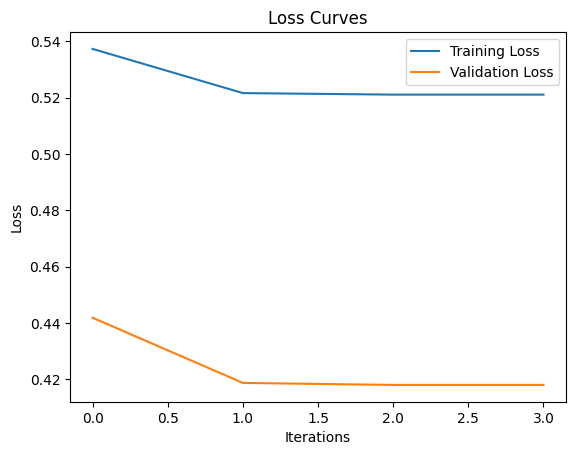

In [25]:

import matplotlib.pyplot as plt

def validate_model(X_val, y_val, w):
    """Validate the learned model on the validation set"""
    loss_val = lasso_regression_loss(X_val, y_val, w, best_lmbda)
    return loss_val

loss_val = validate_model(X_val, y_val, w)
print("Validation Loss:", loss_val)

# Evaluate the model on the test set
loss_test = validate_model(X_test, y_test, w)
print("Test Loss:", loss_test)

# Train the model
w, losses_train, losses_val = projected_gradient_descent(X_train, y_train, X_val, y_val, best_learning_rate, best_lmbda)

# Plot loss curves
plt.plot(losses_train, label='Training Loss')
plt.plot(losses_val, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

